## Getting hang of the data

In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Path to your directory with CSV files
folder_path = r'C:\Users\veers\Machine learning\DS203\Final project\MFCC-files-v2'

# Define the expected number of columns (10,000 in your case)
expected_columns = 10000

# Load each CSV file and create a list of feature vectors
song_vectors = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Load CSV file
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, header=None)
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue
        
        # Check if the number of columns matches the expected size
        if df.shape[1] < expected_columns:
            # Pad with zeros if there are fewer columns
            padded_df = pd.DataFrame(np.pad(df.values, ((0, 0), (0, expected_columns - df.shape[1])), 'constant'))
        else:
            # Truncate if there are more columns
            padded_df = df.iloc[:, :expected_columns]

        # Aggregate MFCCs by averaging across rows
        song_vector = padded_df.mean(axis=0).values
        song_vectors.append(song_vector)

# Convert list to a NumPy array
song_vectors = np.array(song_vectors)

'''# Standardize the feature vectors
scaler = StandardScaler()
song_vectors_scaled = scaler.fit_transform(song_vectors)

# Perform KMeans clustering with adjustments
num_clusters = 6  # Targeting 6 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=20, init='k-means++')
labels = kmeans.fit_predict(song_vectors_scaled)

# Output the cluster labels for each song
print("Cluster Labels:")
for i, label in enumerate(labels):
    print(f"Song {i+1}: Cluster {label}")

# Count the number of unique clusters
unique_clusters = len(np.unique(labels))
print(f"\nNumber of unique clusters found: {unique_clusters}")
if unique_clusters == num_clusters:
    print("Successfully achieved target cluster count.")
else:
    print("The clustering did not achieve the target count. Consider adjusting parameters.")'''



'# Standardize the feature vectors\nscaler = StandardScaler()\nsong_vectors_scaled = scaler.fit_transform(song_vectors)\n\n# Perform KMeans clustering with adjustments\nnum_clusters = 6  # Targeting 6 clusters\nkmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=20, init=\'k-means++\')\nlabels = kmeans.fit_predict(song_vectors_scaled)\n\n# Output the cluster labels for each song\nprint("Cluster Labels:")\nfor i, label in enumerate(labels):\n    print(f"Song {i+1}: Cluster {label}")\n\n# Count the number of unique clusters\nunique_clusters = len(np.unique(labels))\nprint(f"\nNumber of unique clusters found: {unique_clusters}")\nif unique_clusters == num_clusters:\n    print("Successfully achieved target cluster count.")\nelse:\n    print("The clustering did not achieve the target count. Consider adjusting parameters.")'

## Genre-Based MFCC Pattern Recognition

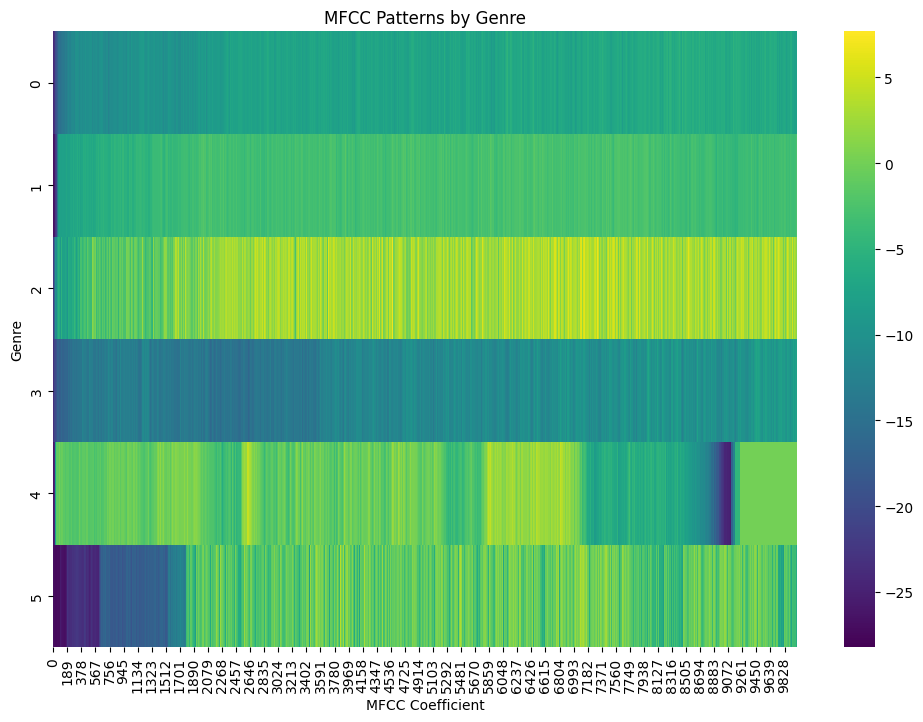

In [ ]:
import seaborn as sns

# Assume each category of songs has been clustered into a group (e.g., National Anthem, Lavni)
genre_means = []
for genre_id in range(num_clusters):
    genre_means.append(np.mean(song_vectors[labels == genre_id], axis=0))

# Plot MFCC heatmap for each genre
plt.figure(figsize=(12, 8))
sns.heatmap(genre_means, cmap='viridis')
plt.title("MFCC Patterns by Genre")
plt.xlabel("MFCC Coefficient")
plt.ylabel("Genre")
plt.show()


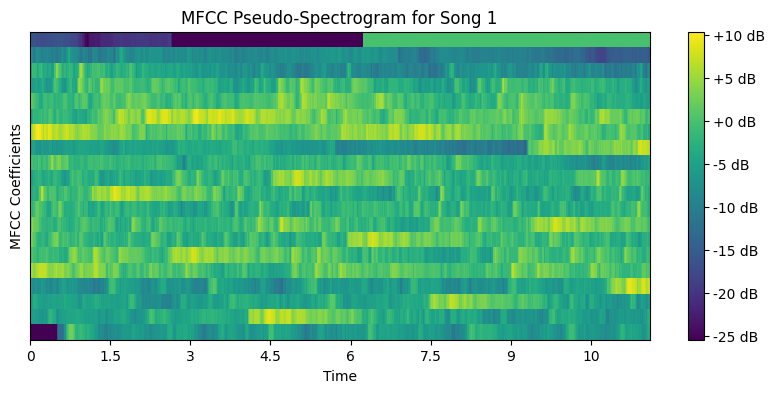

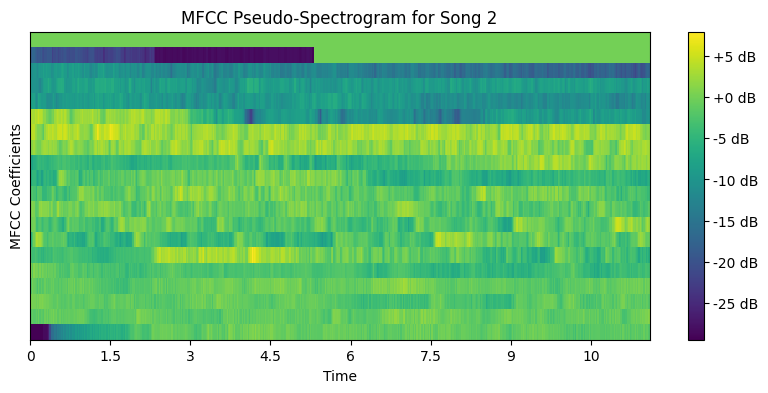

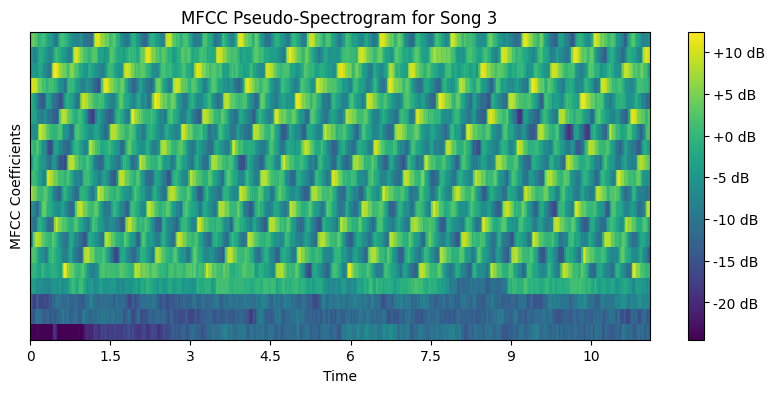

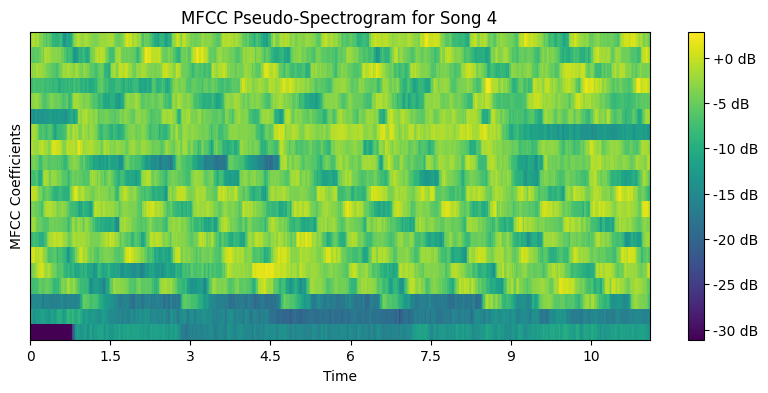

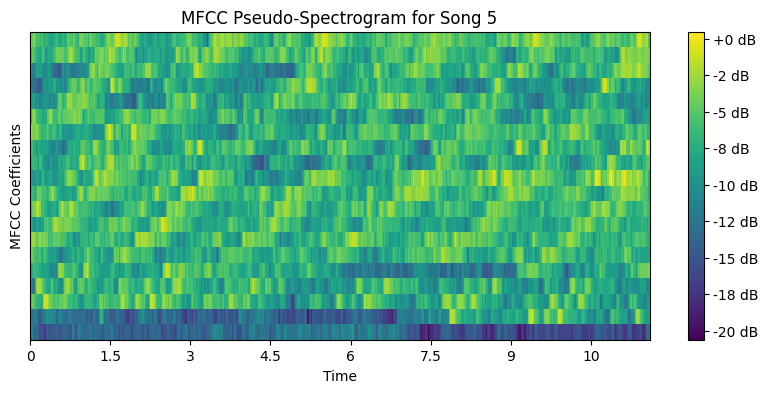

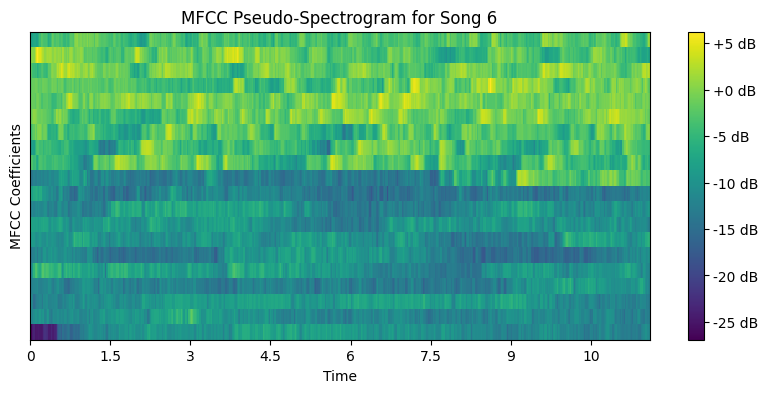

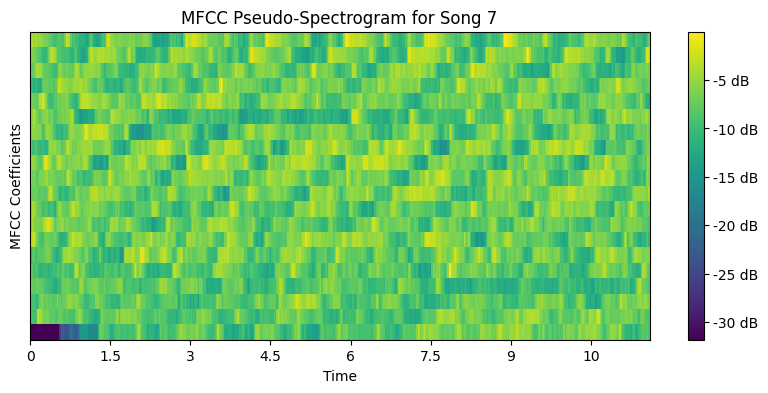

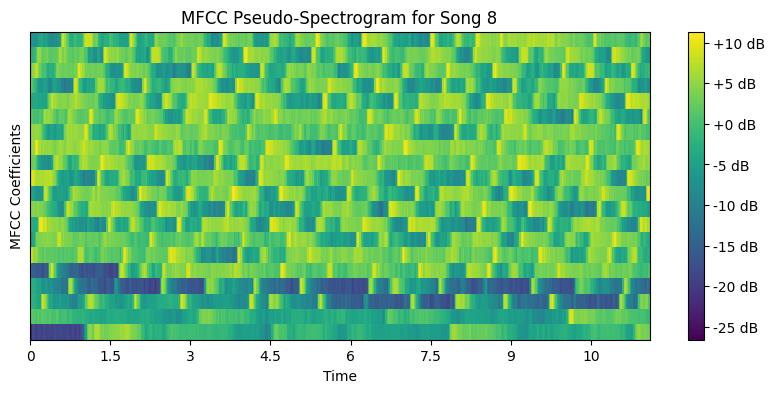

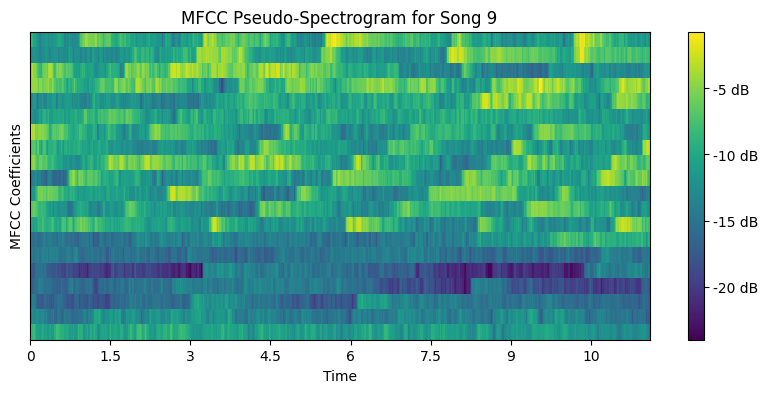

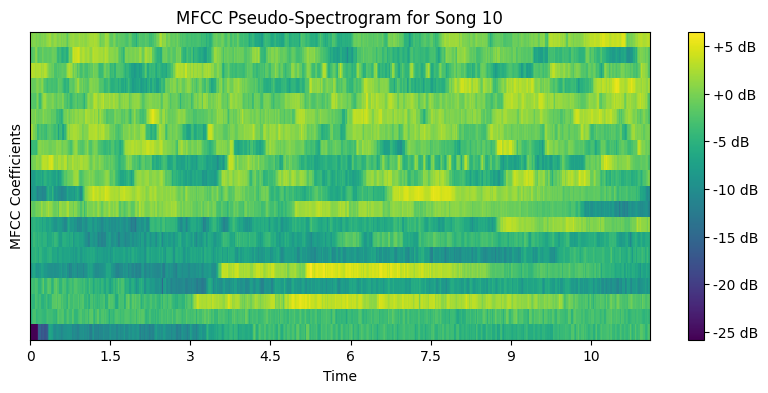

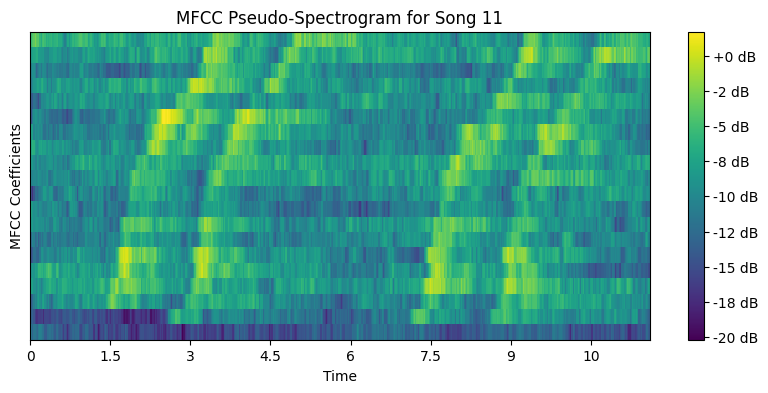

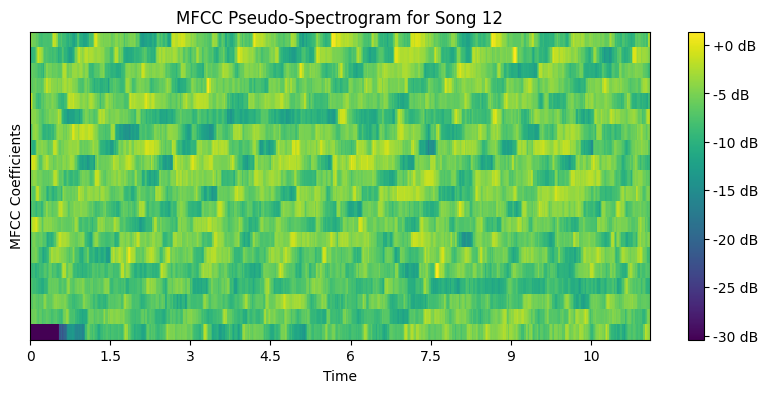

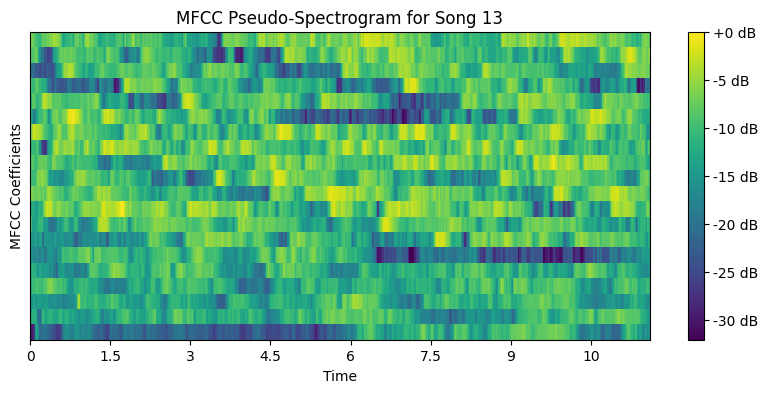

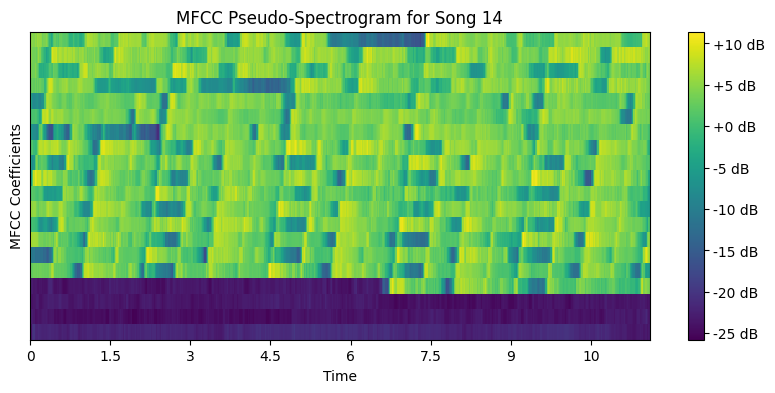

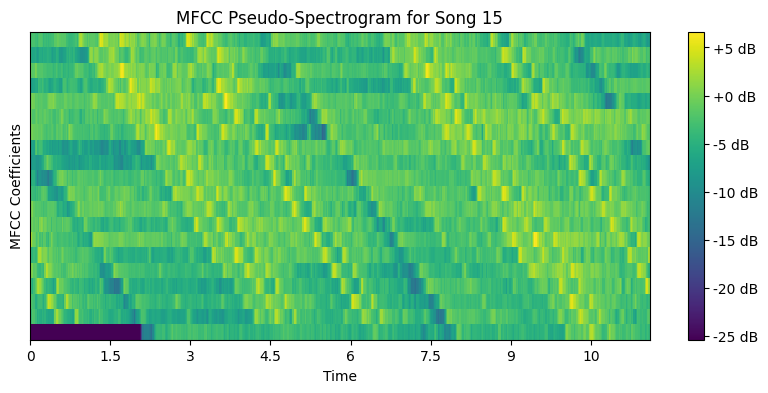

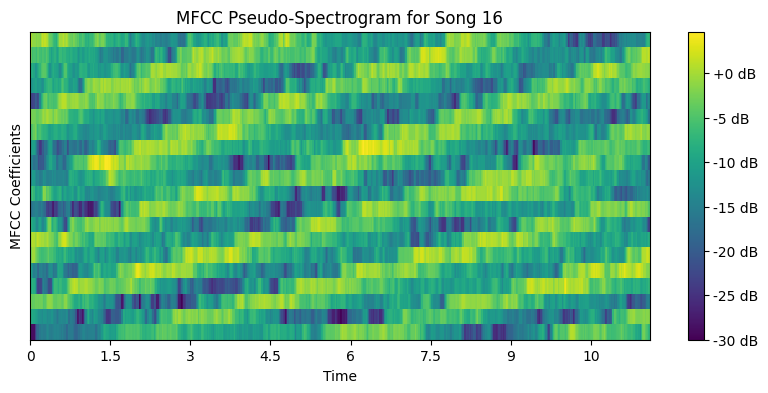

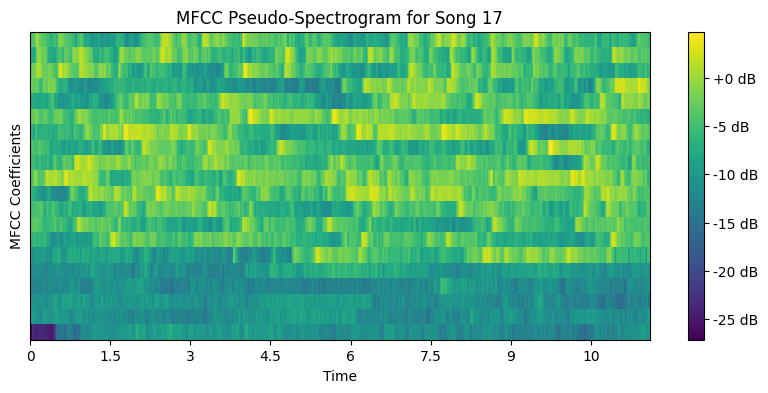

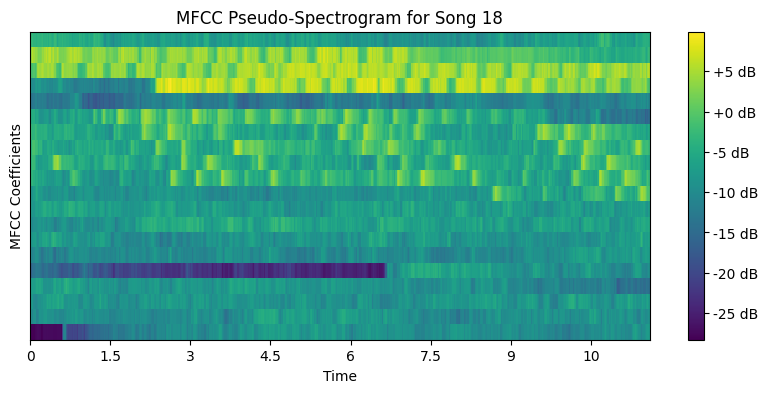

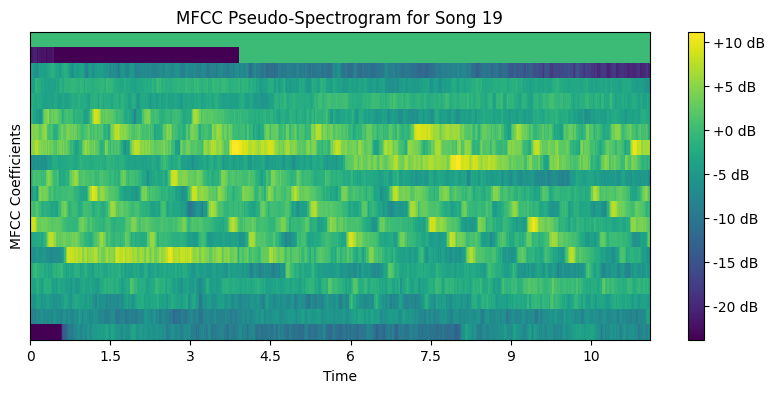

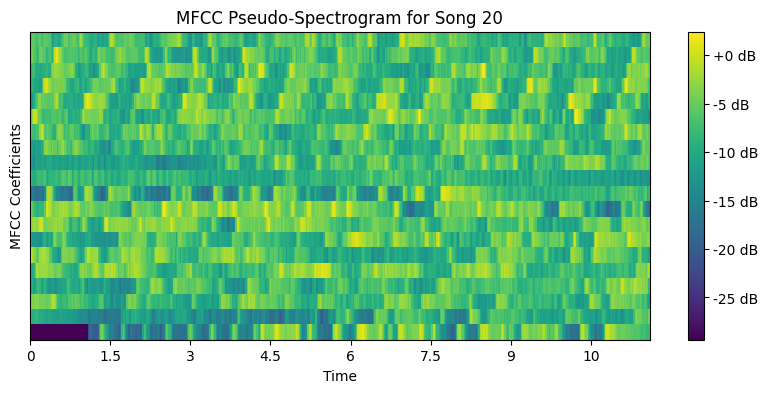

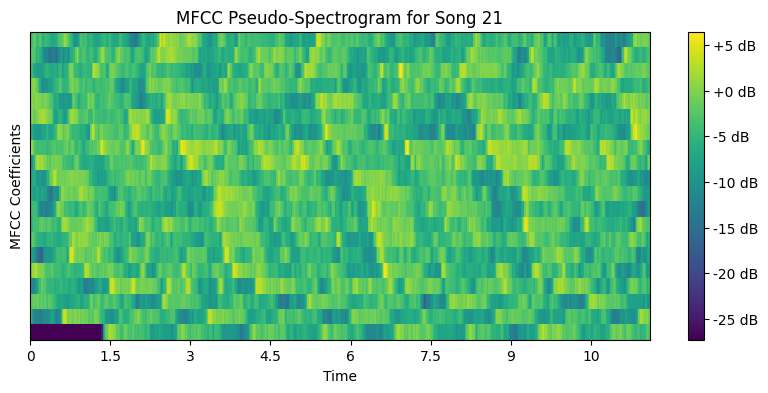

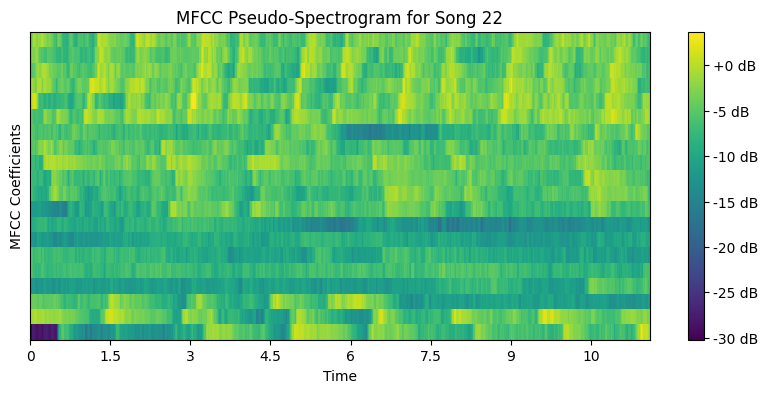

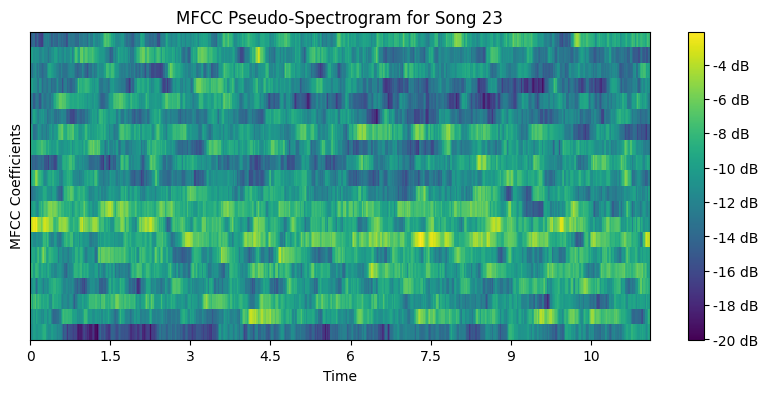

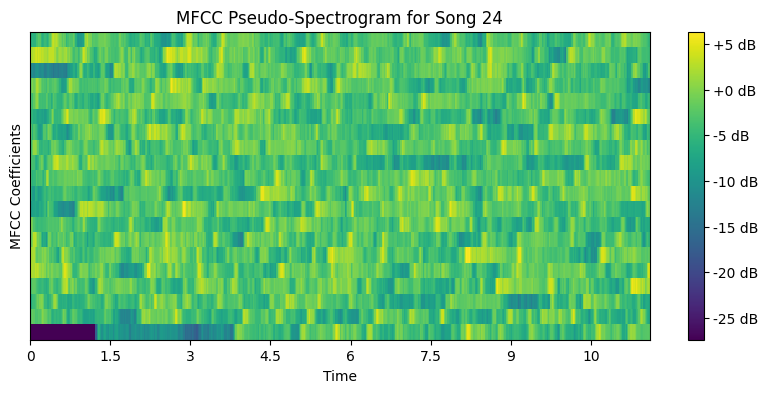

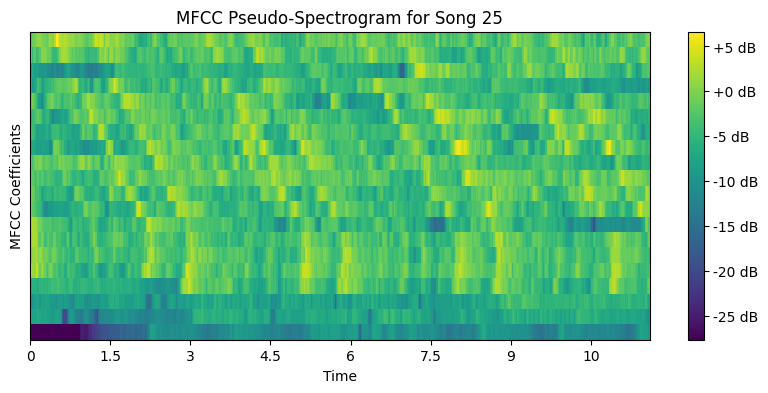

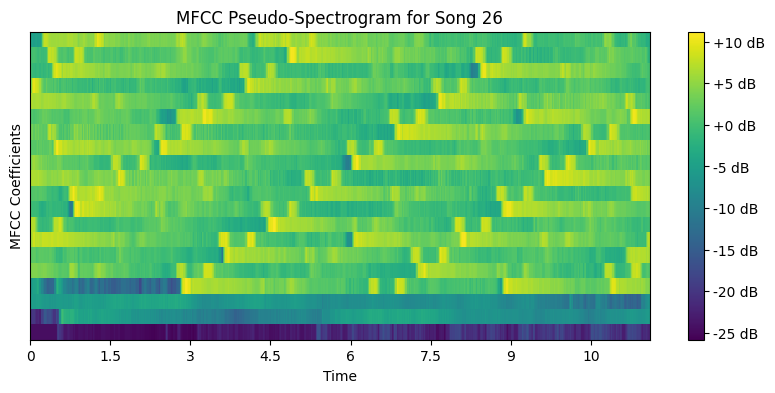

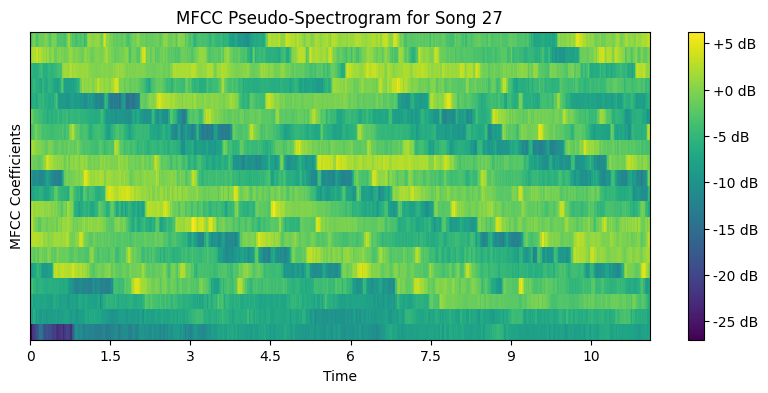

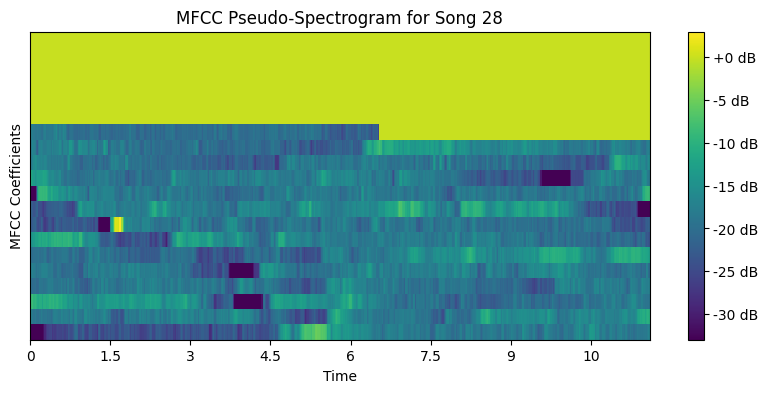

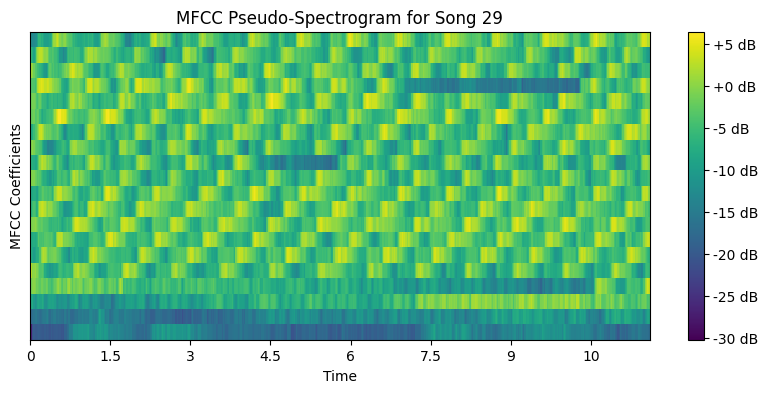

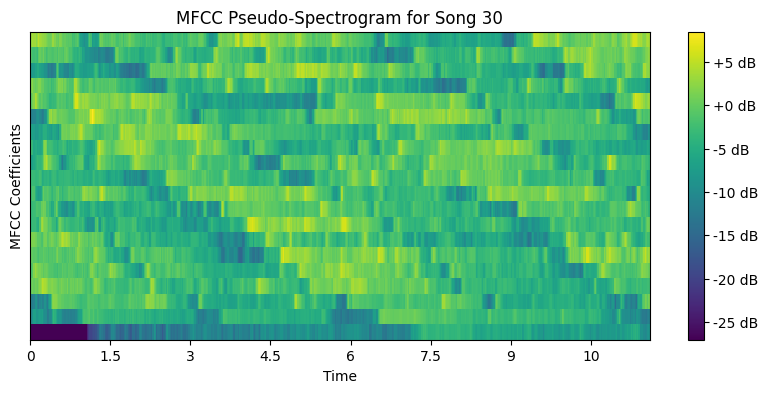

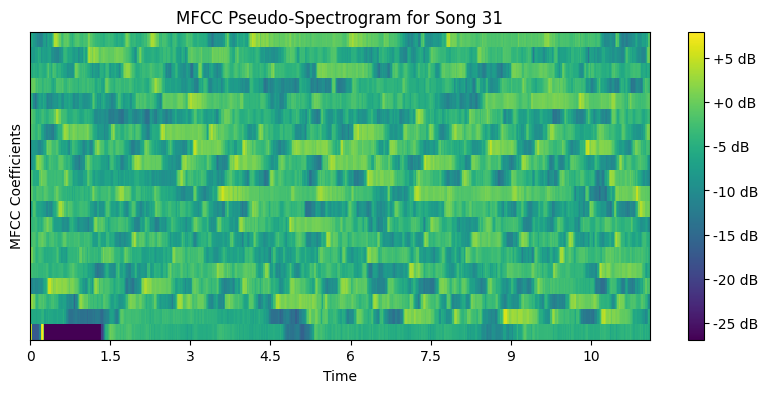

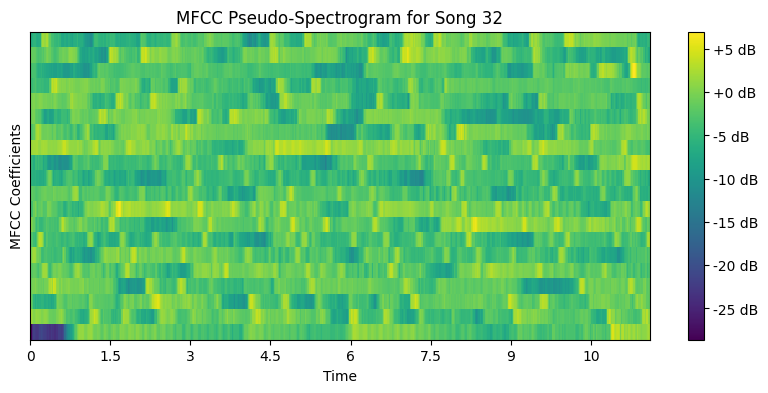

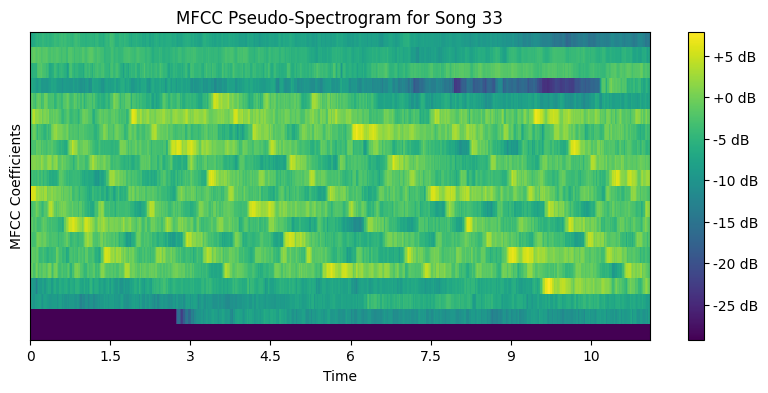

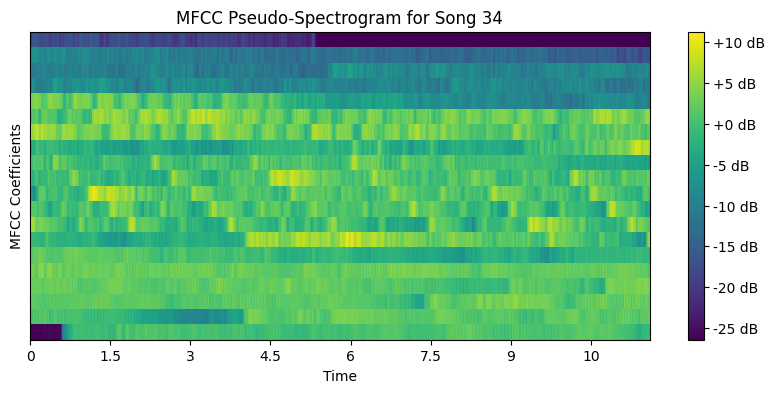

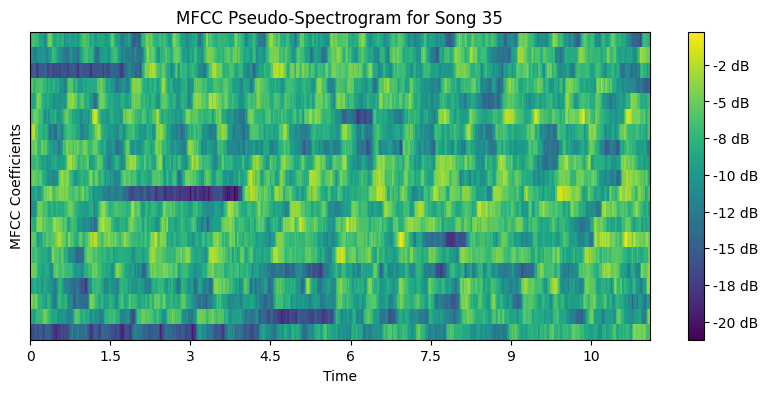

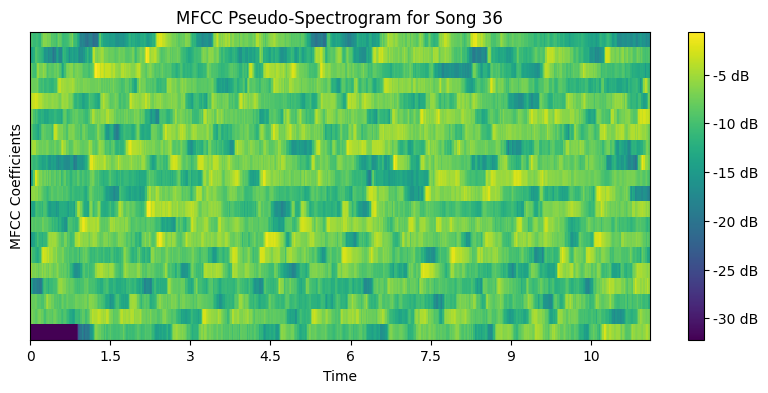

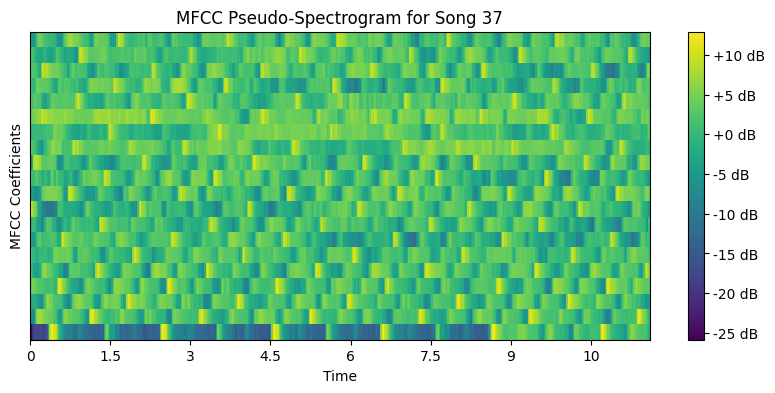

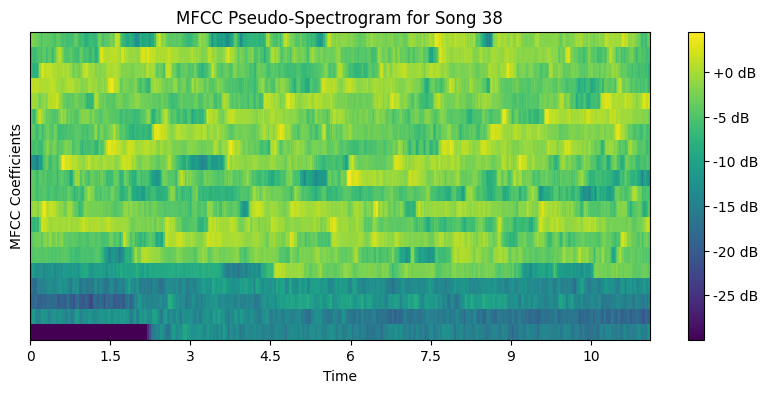

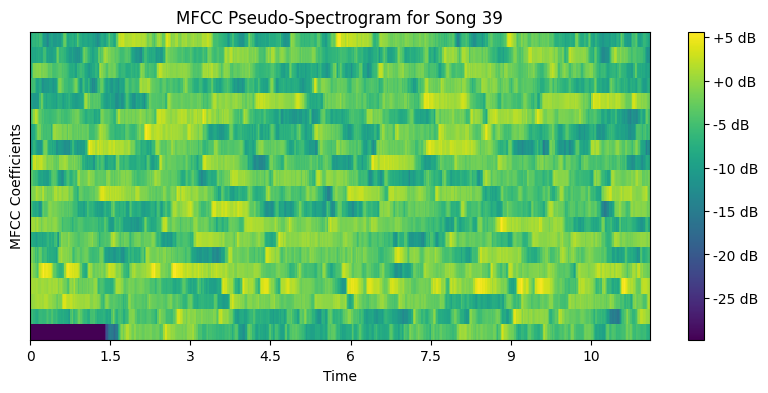

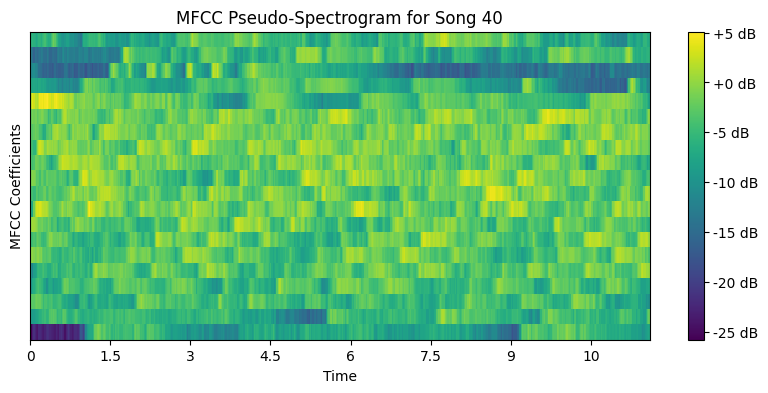

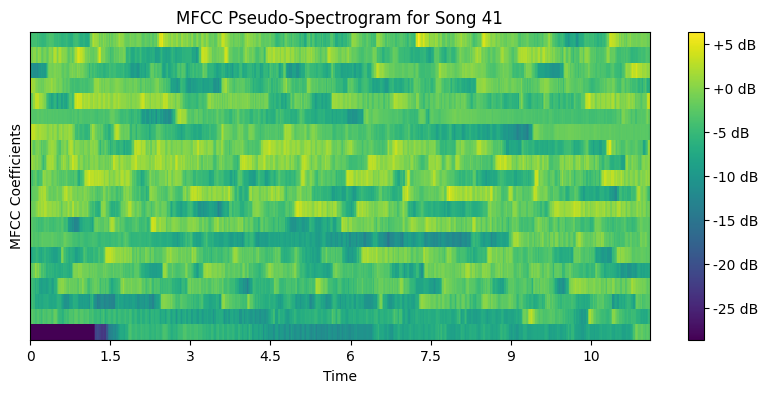

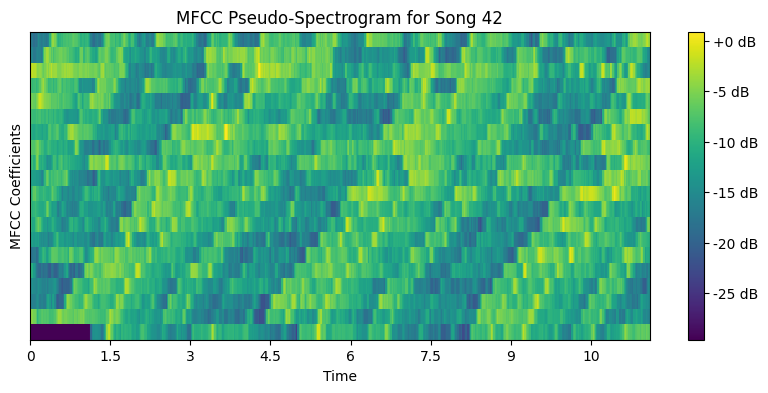

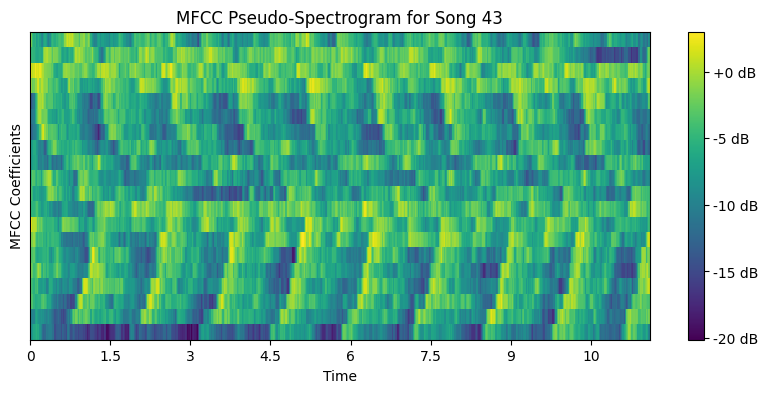

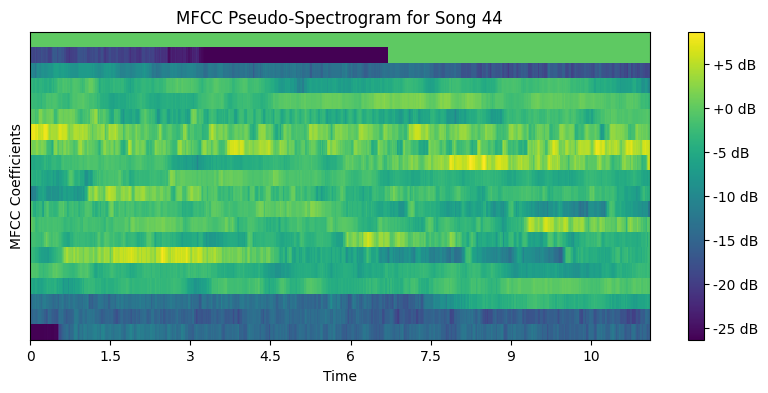

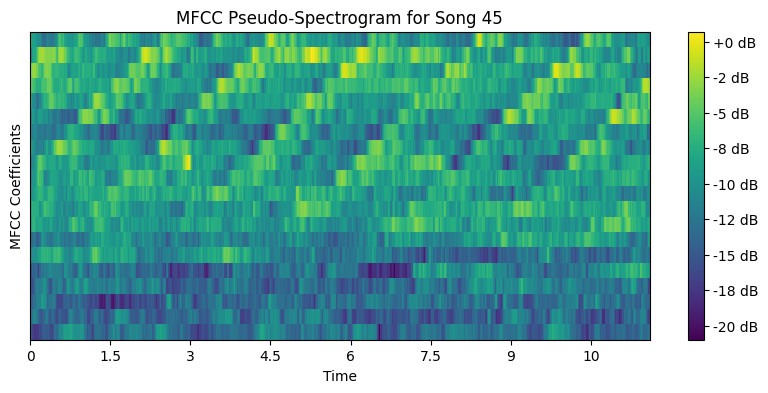

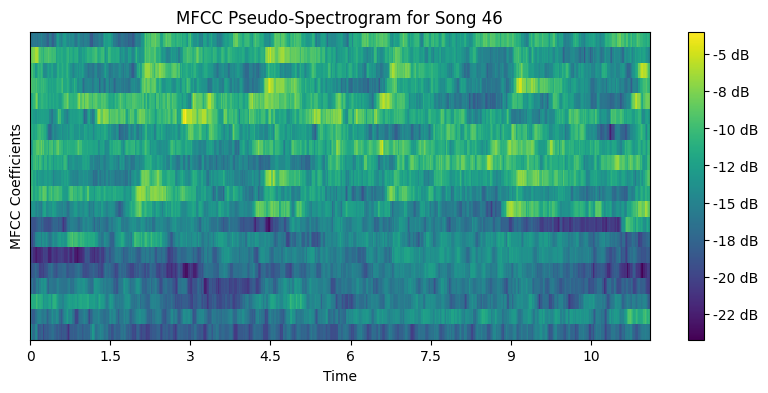

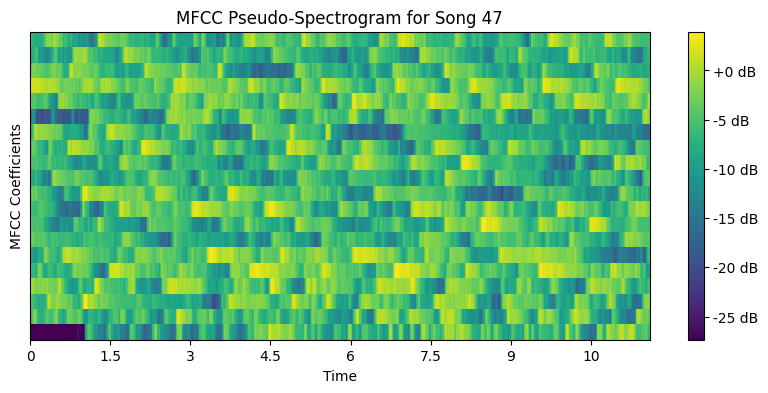

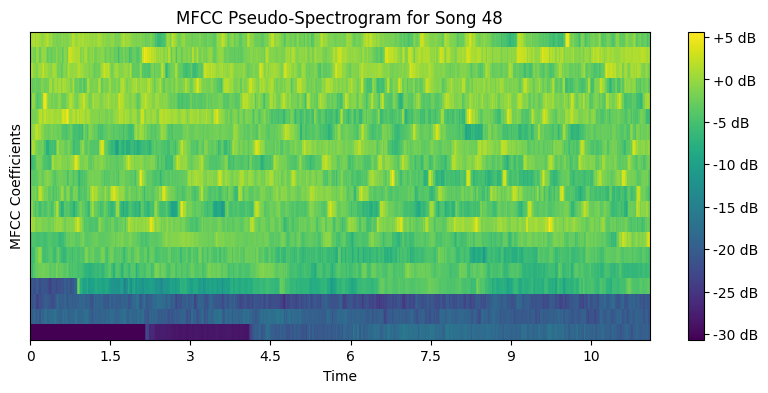

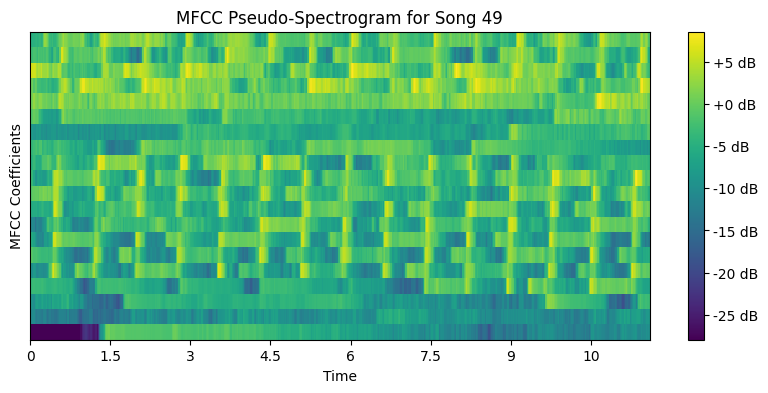

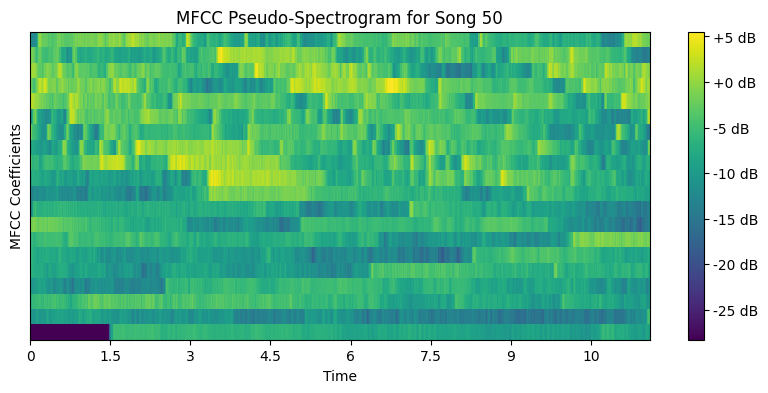

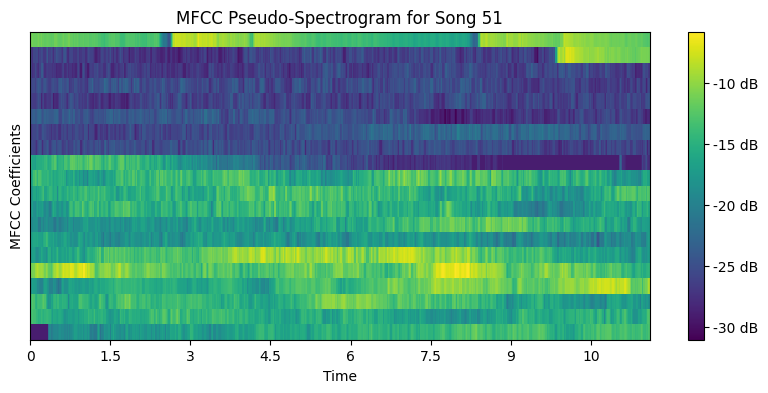

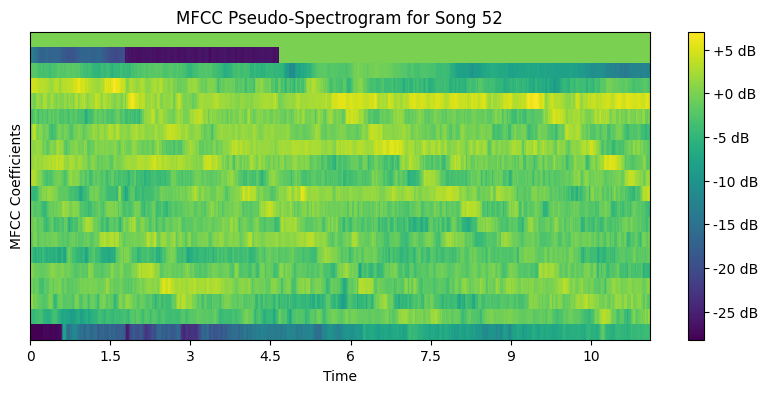

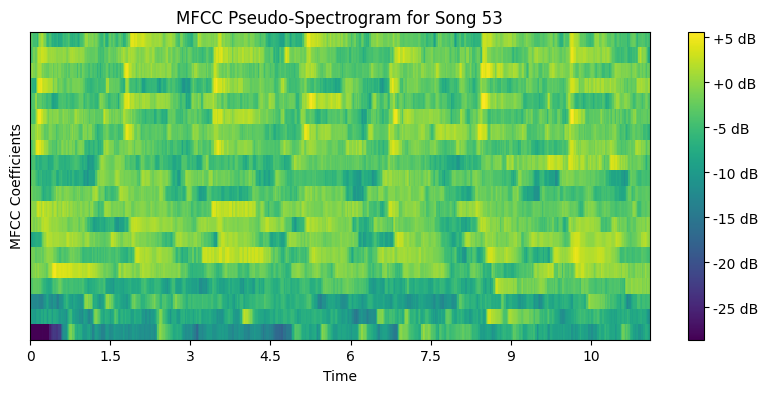

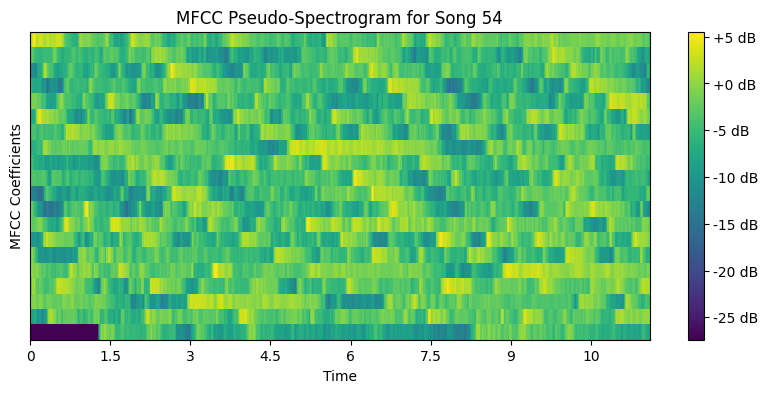

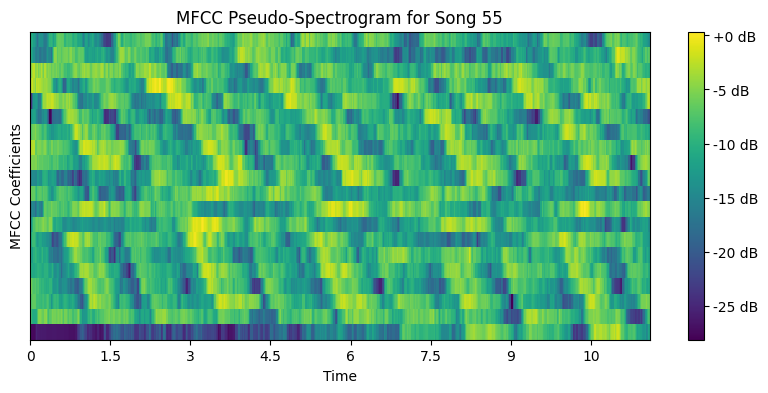

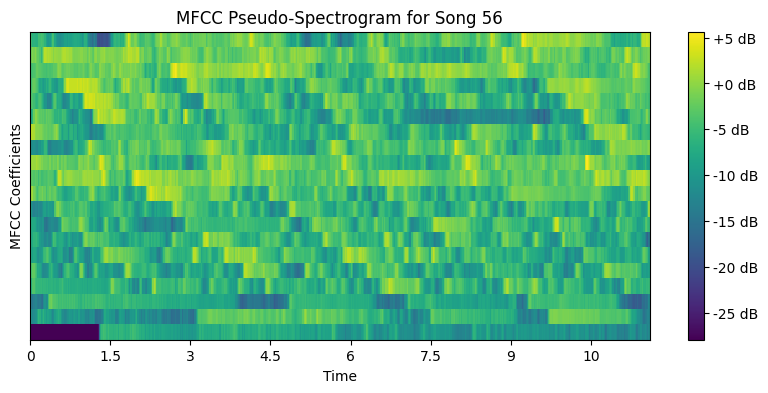

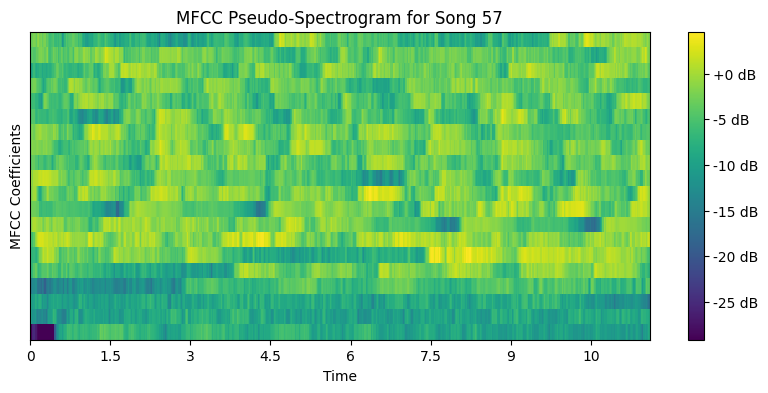

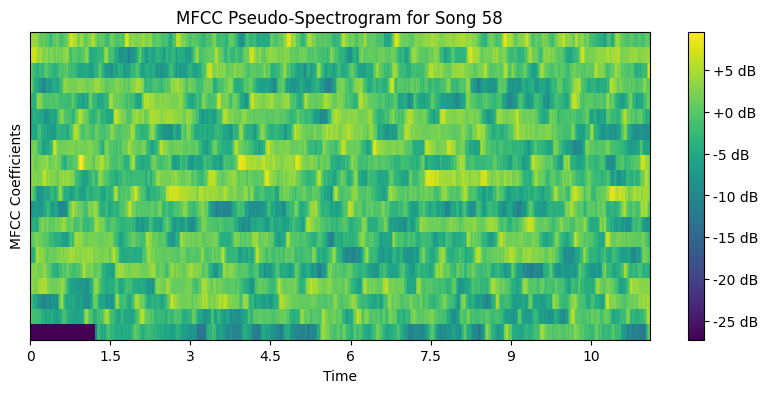

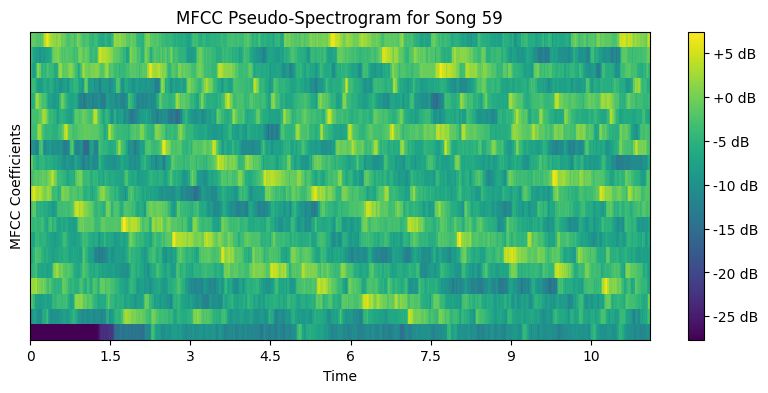

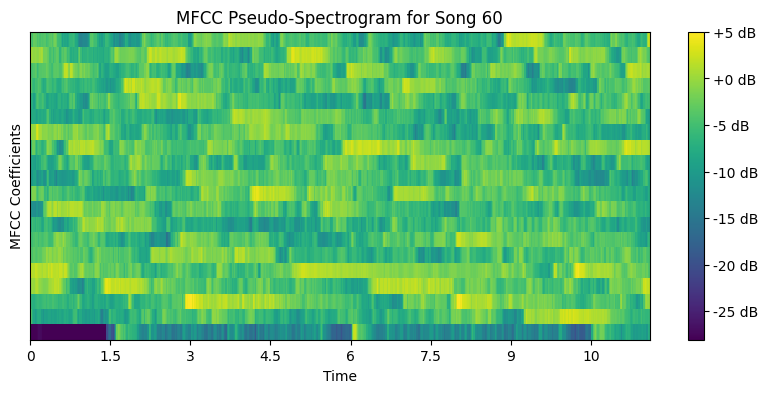

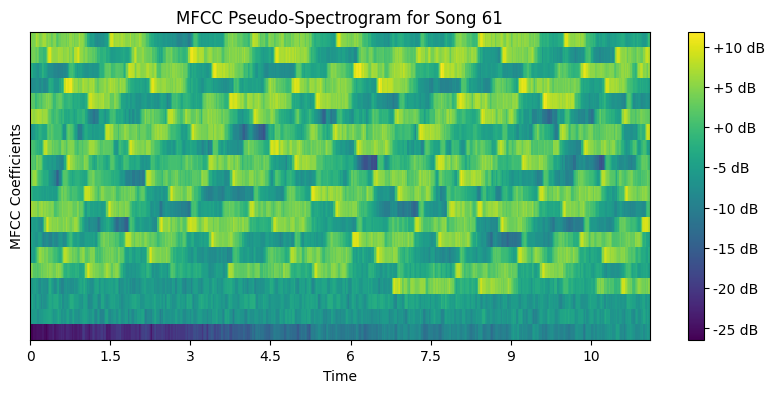

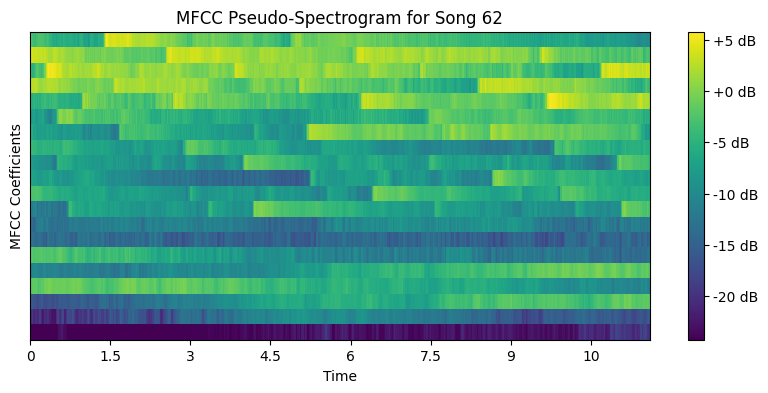

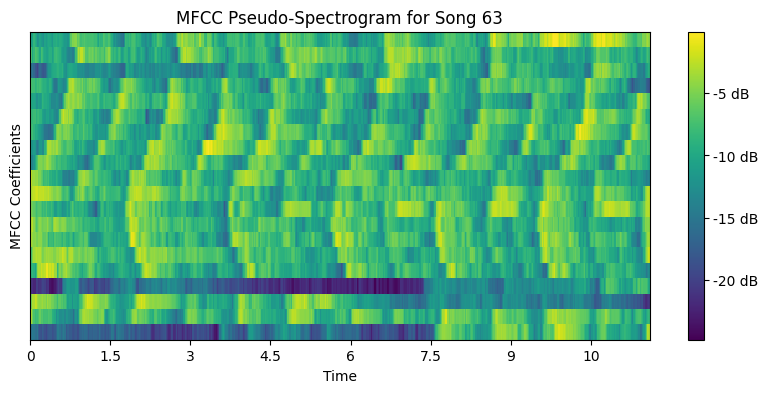

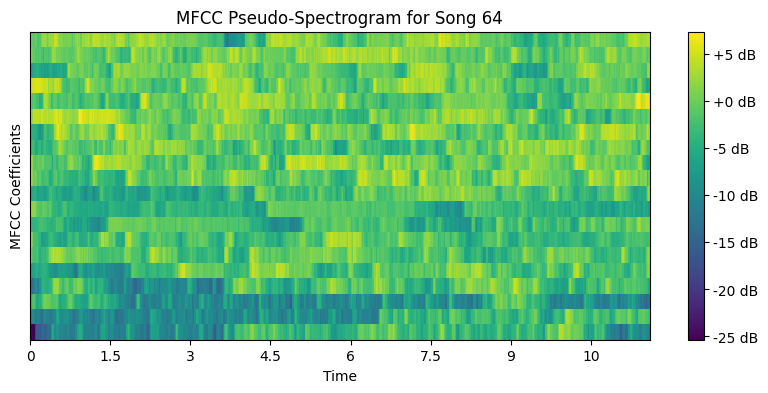

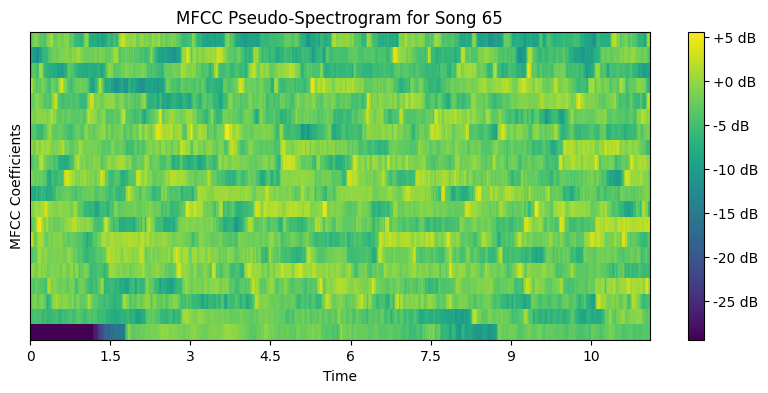

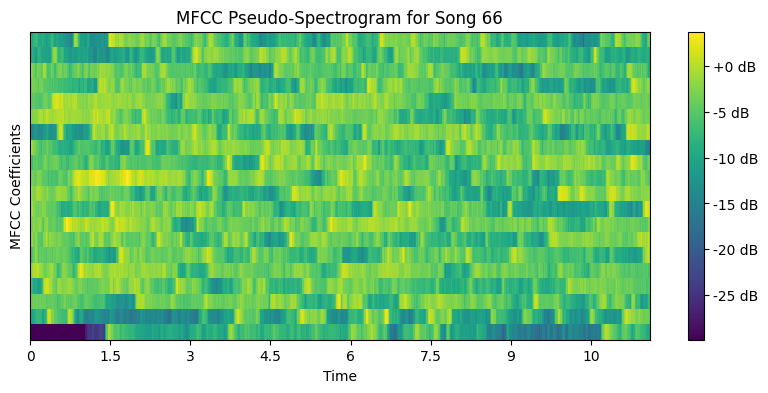

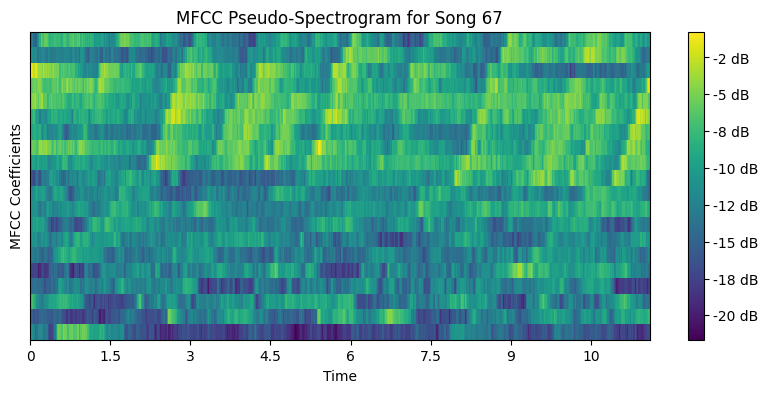

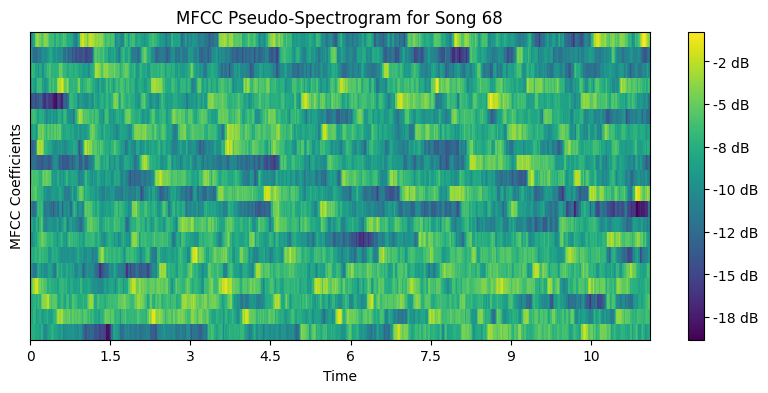

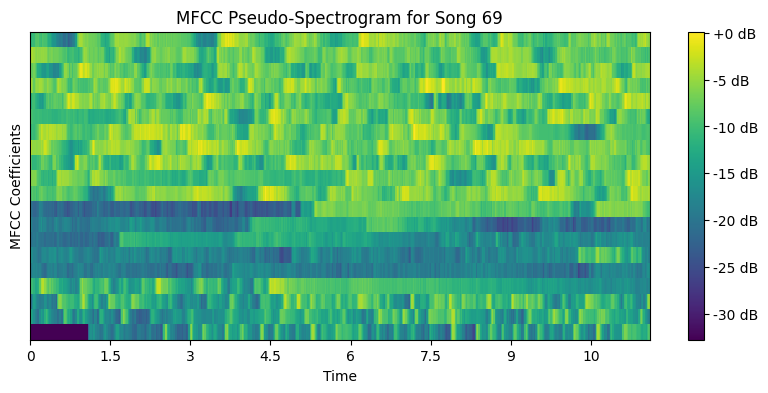

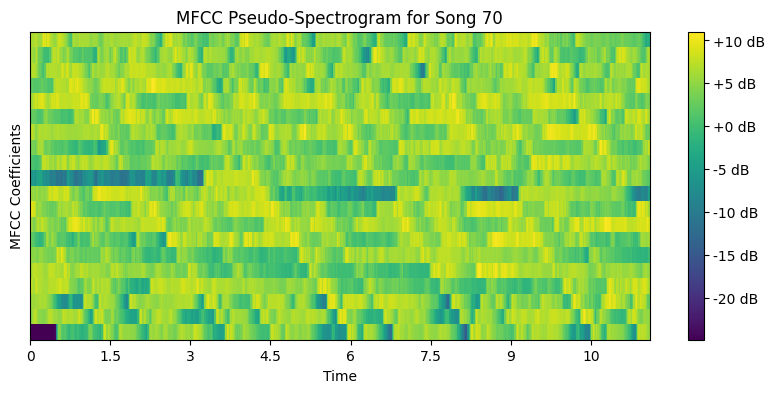

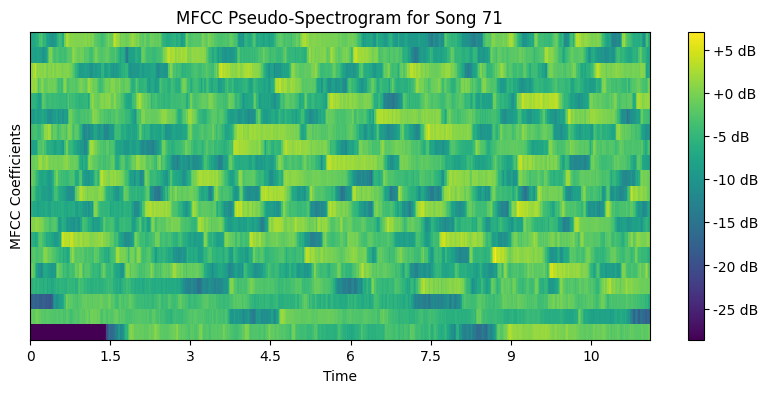

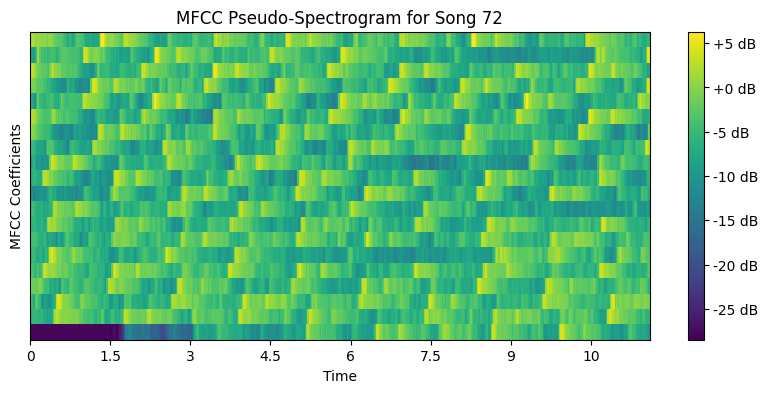

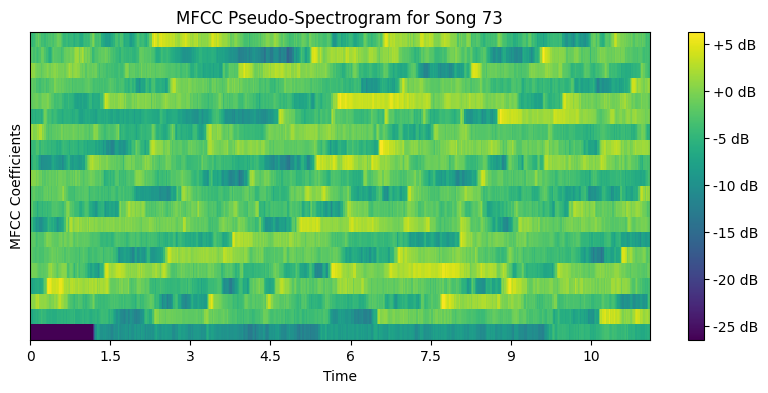

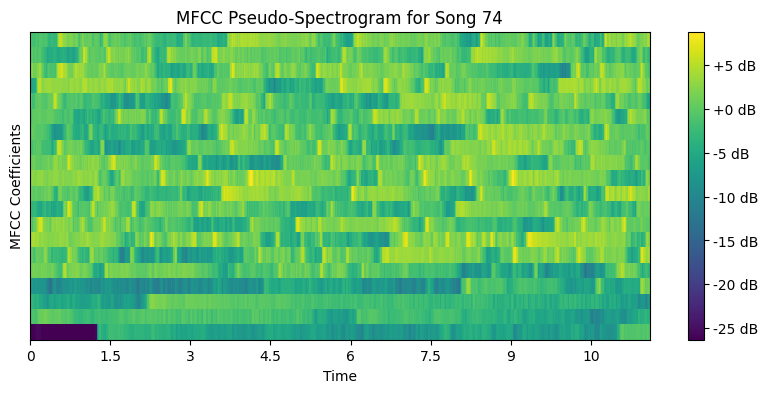

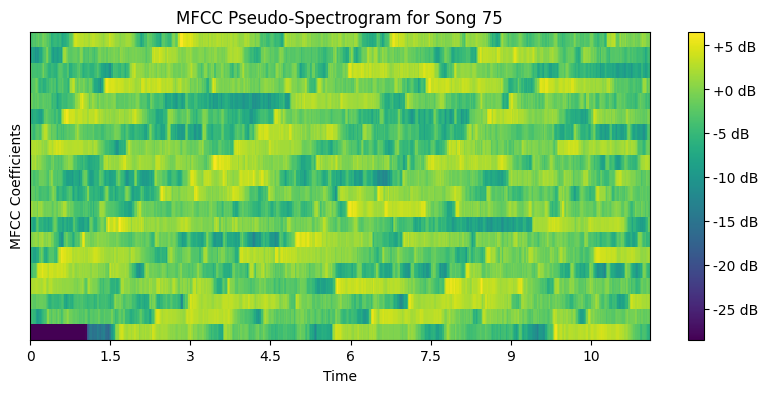

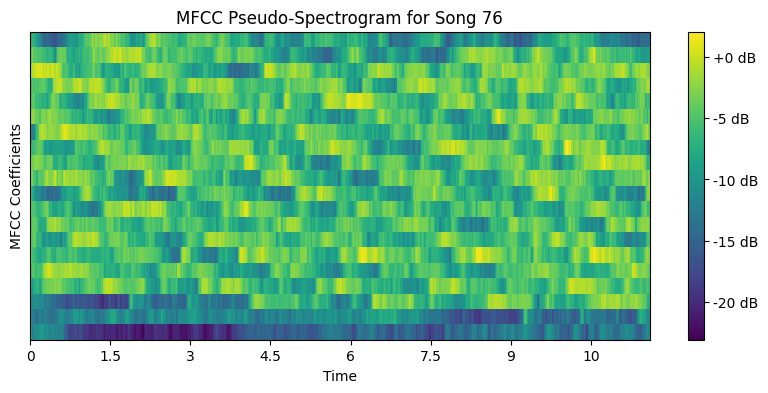

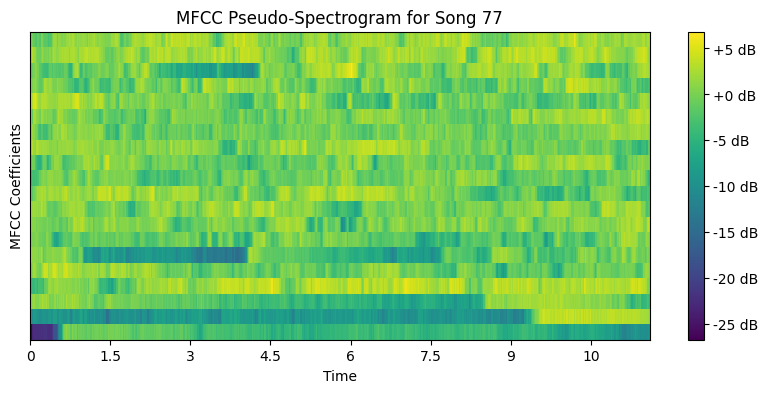

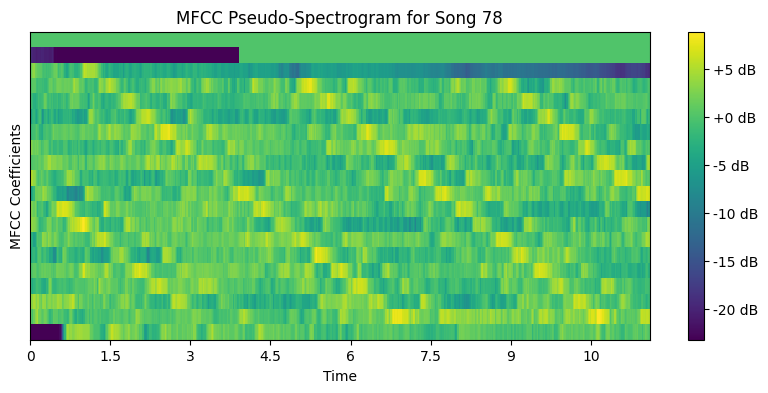

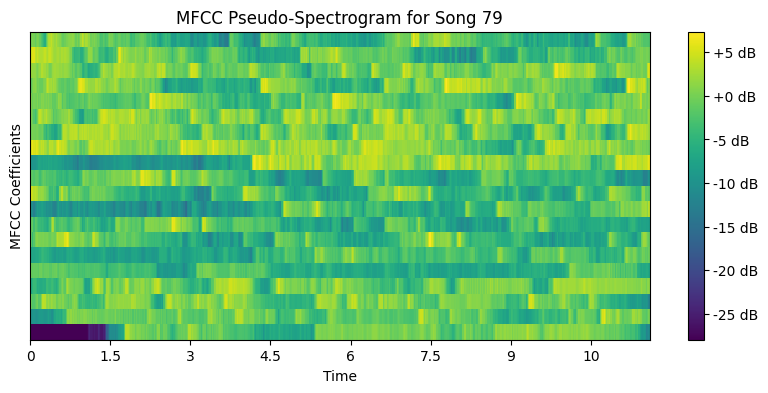

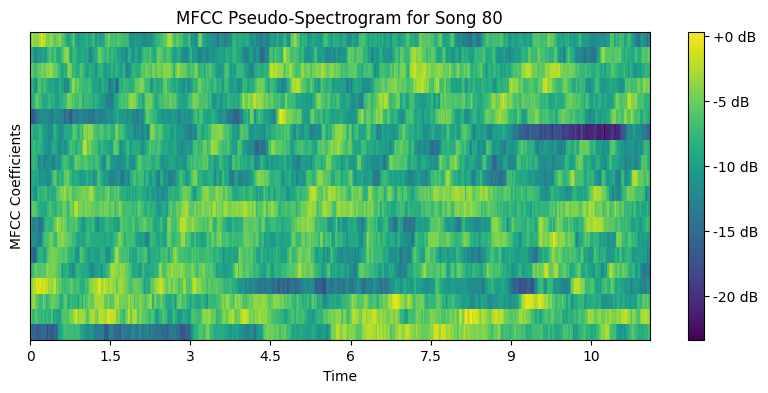

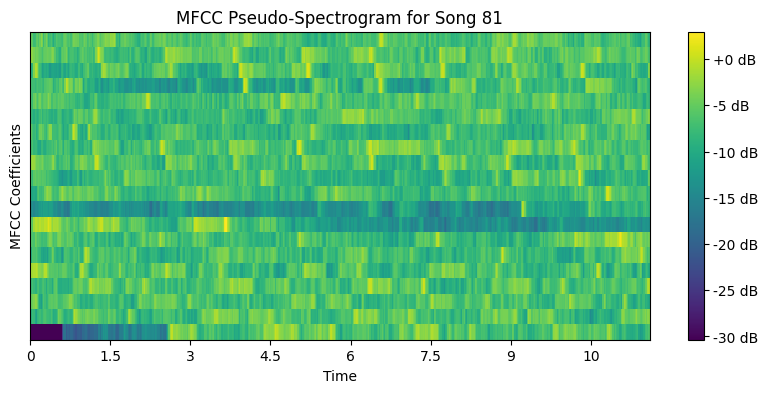

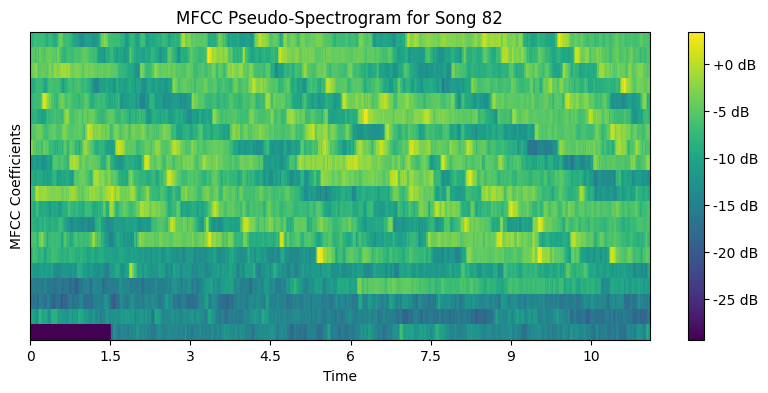

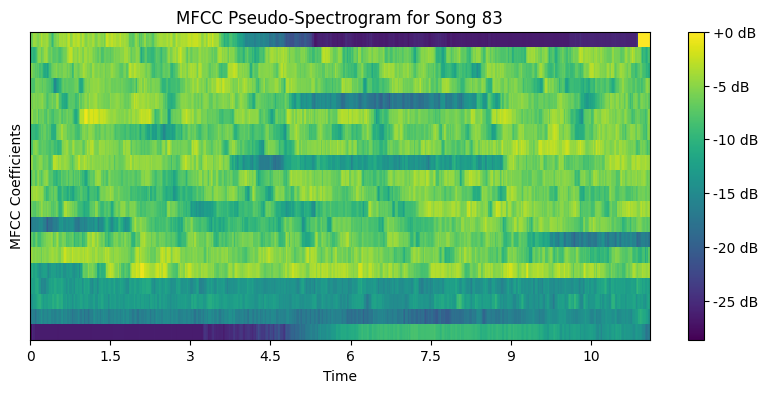

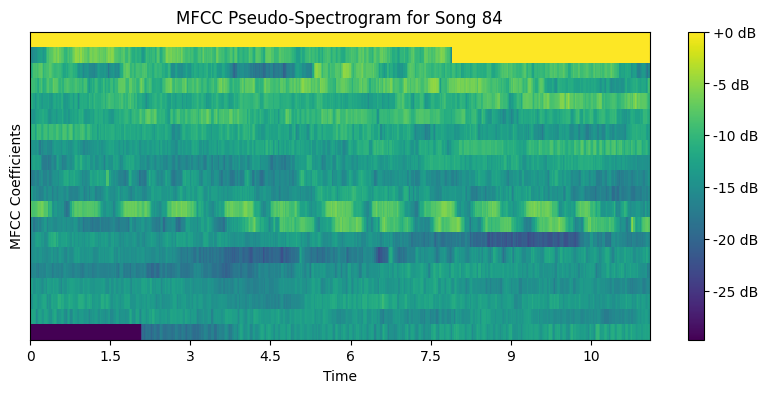

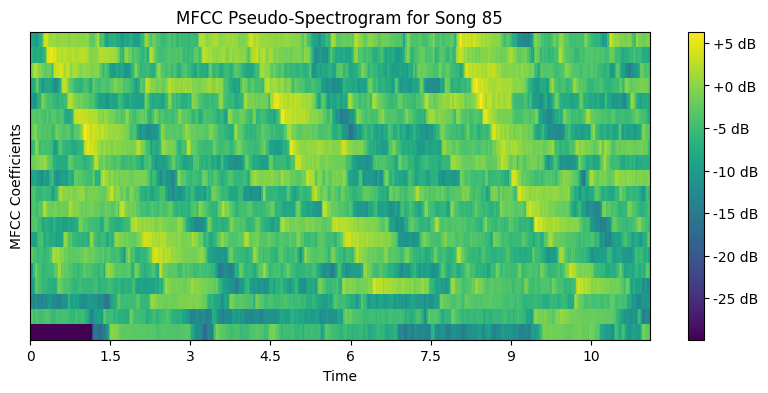

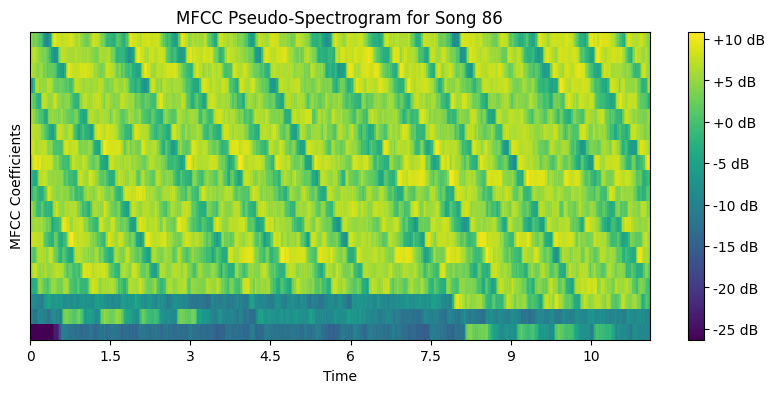

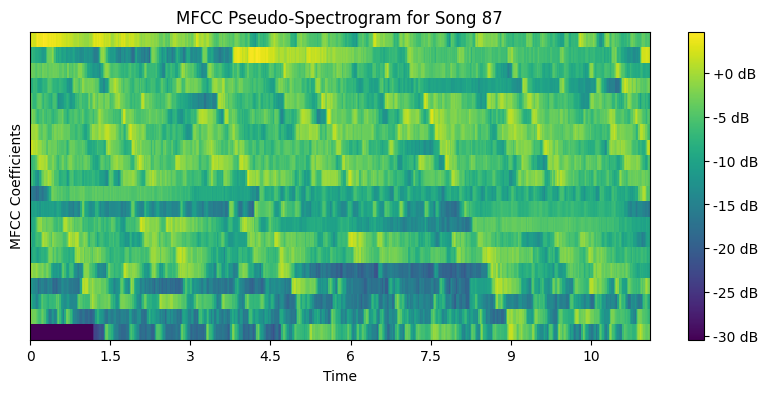

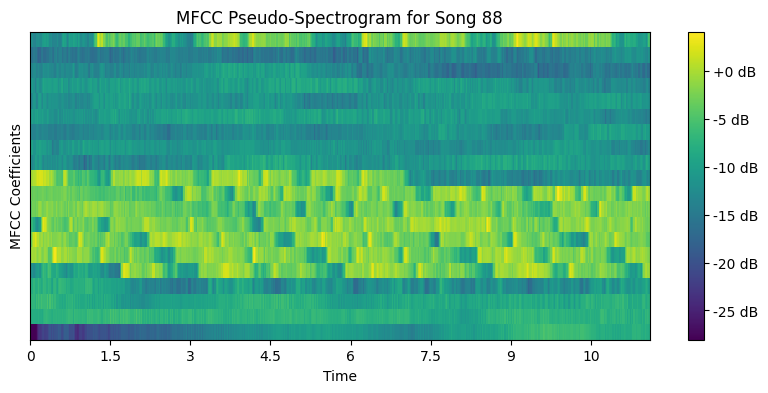

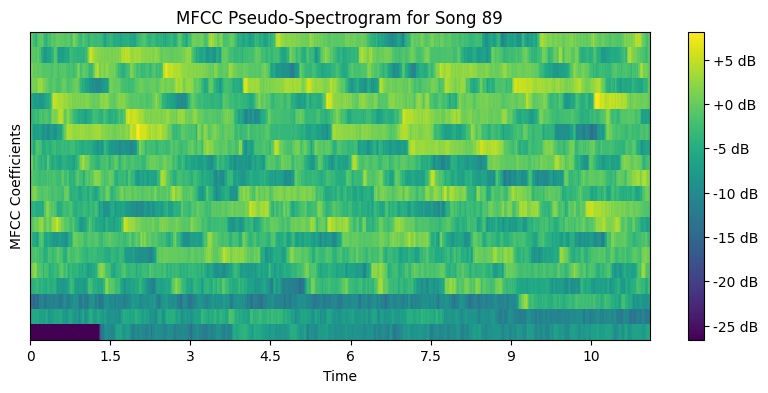

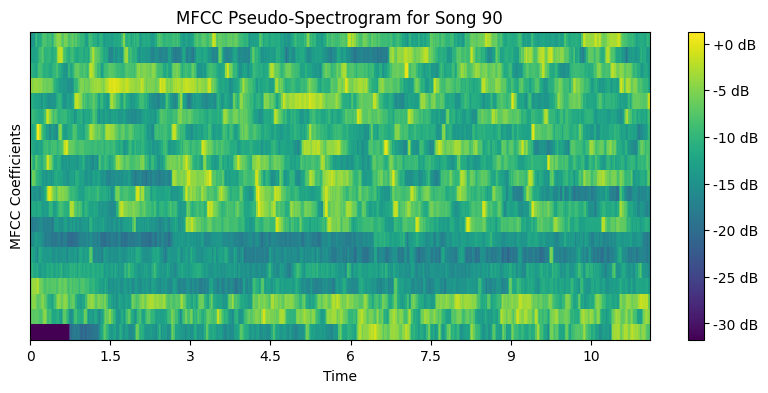

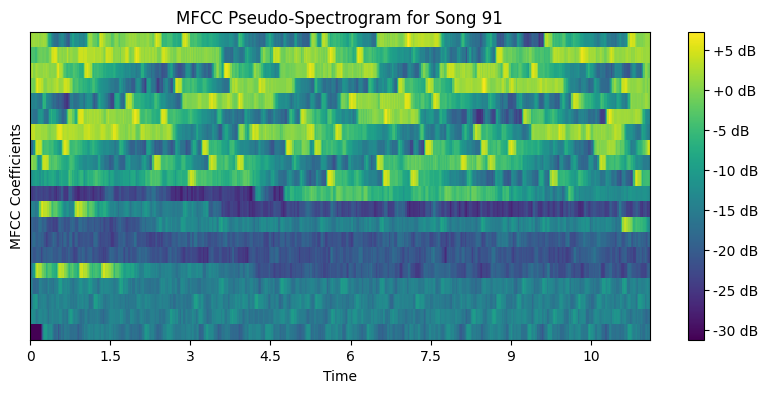

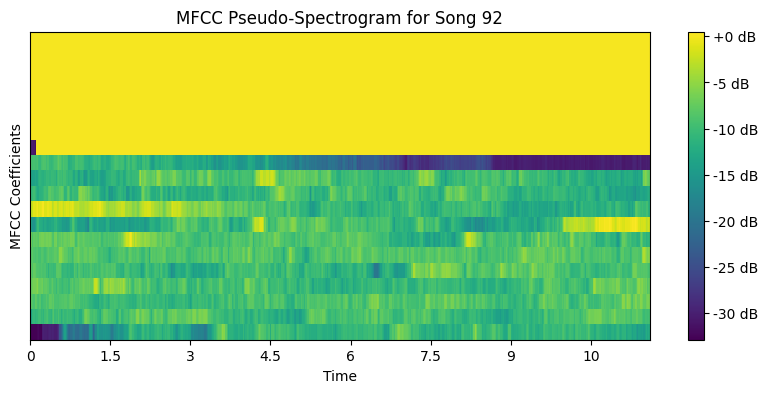

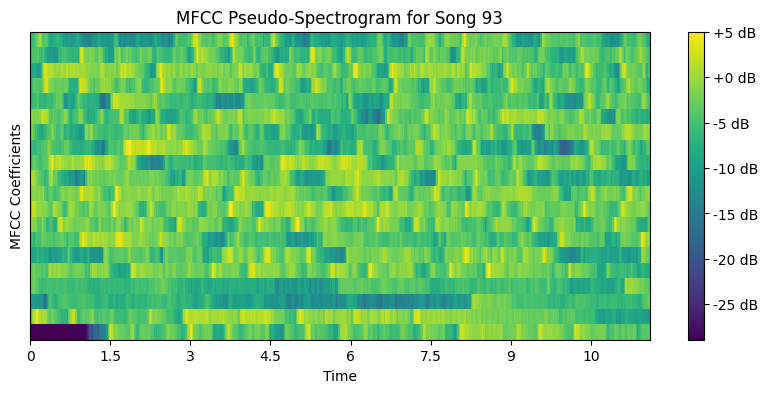

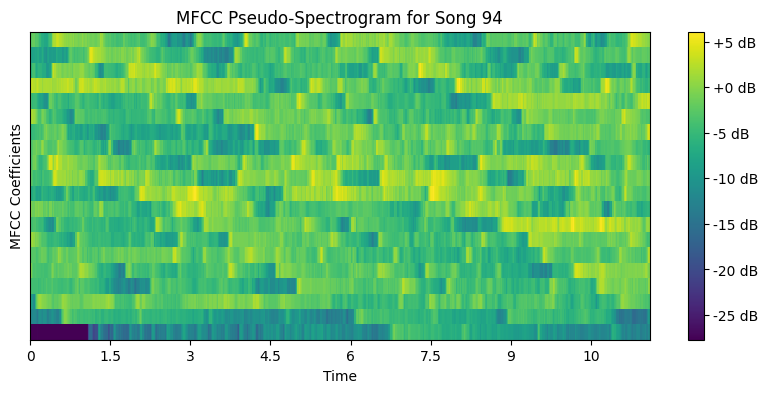

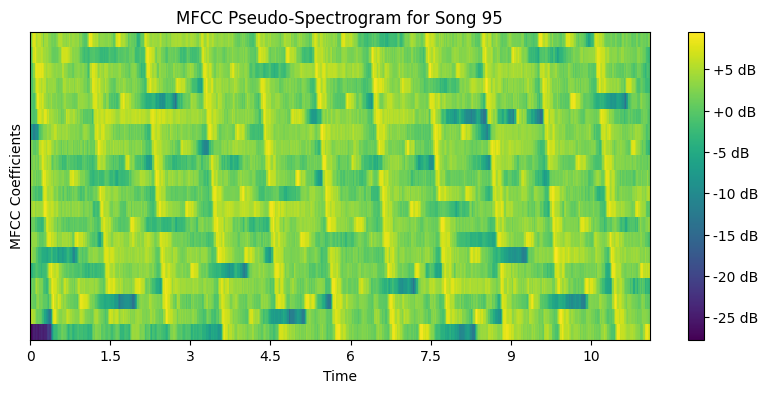

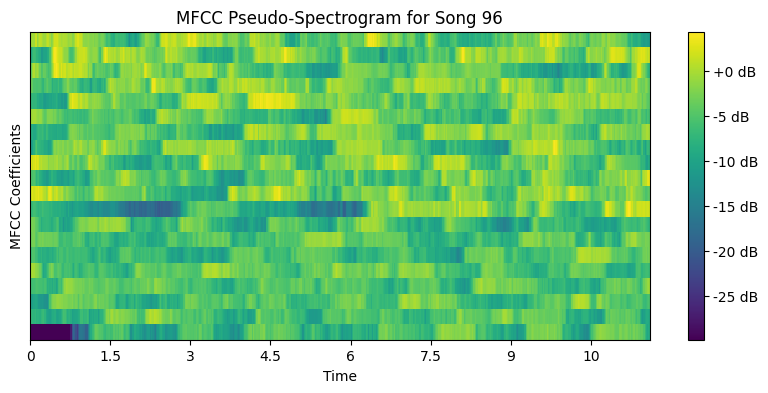

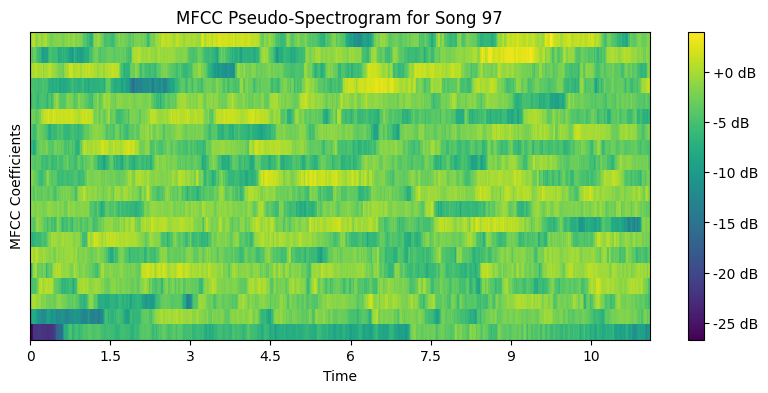

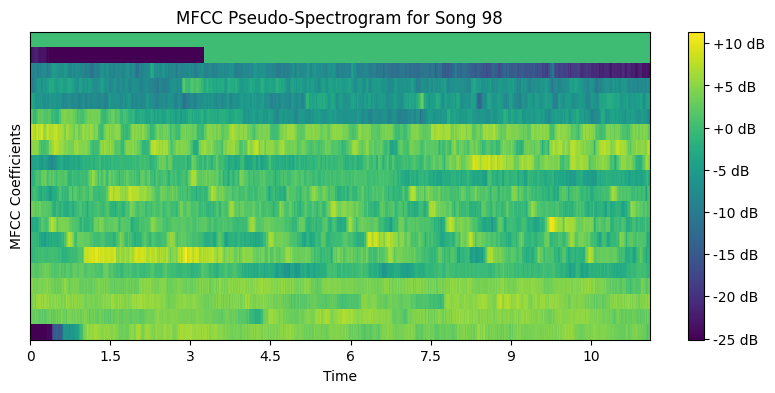

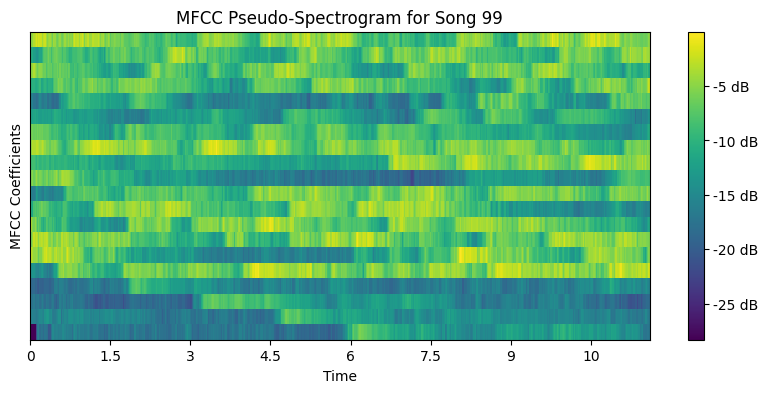

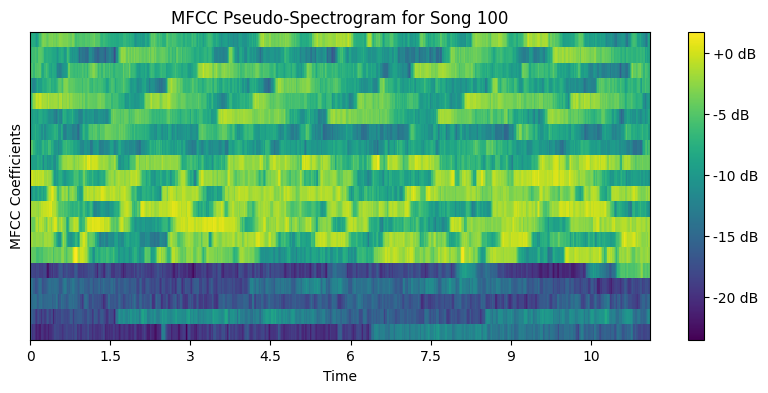

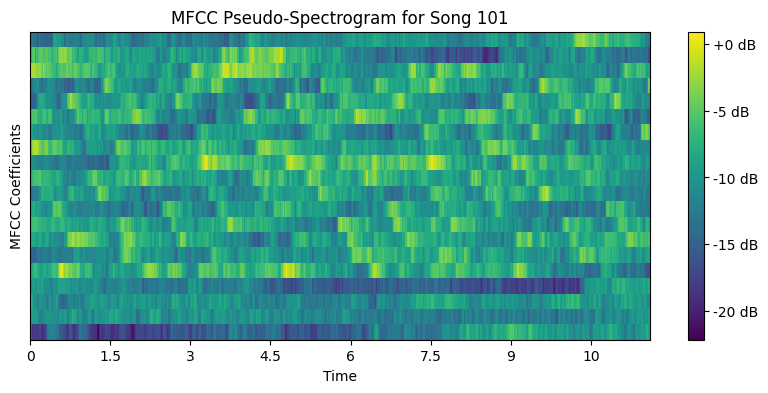

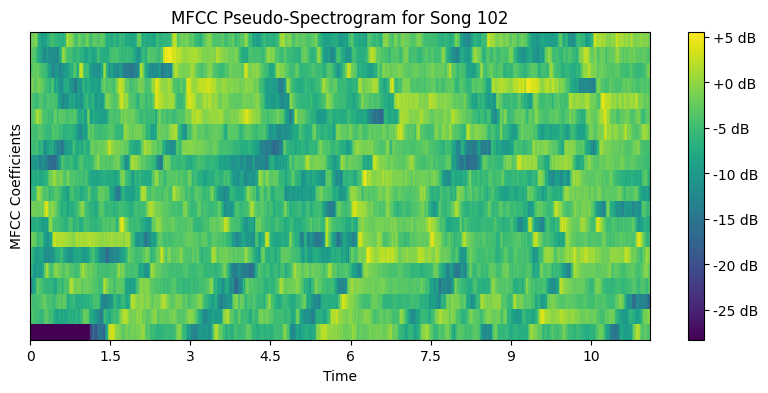

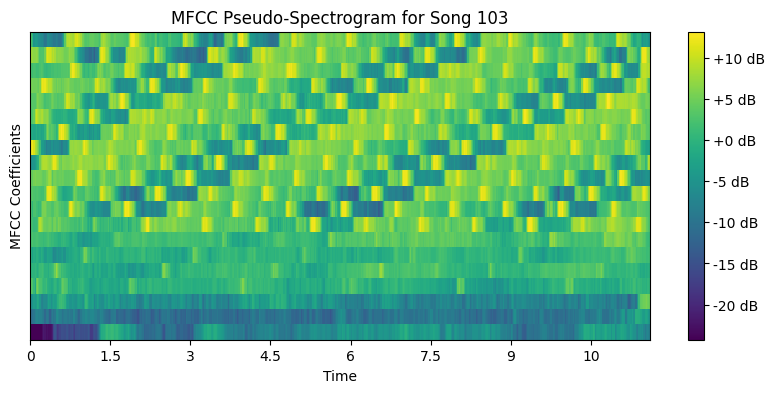

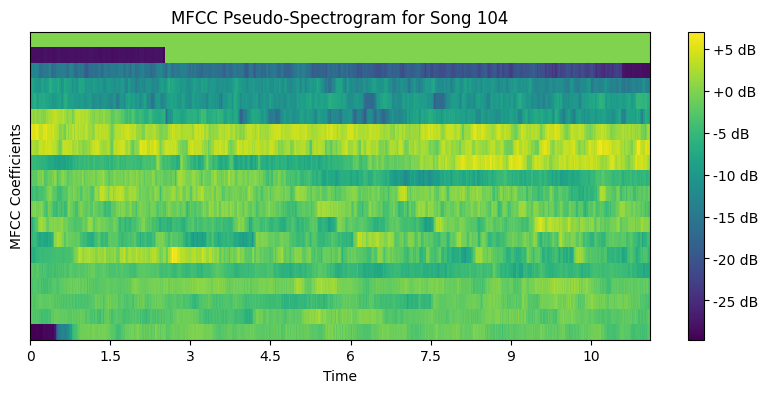

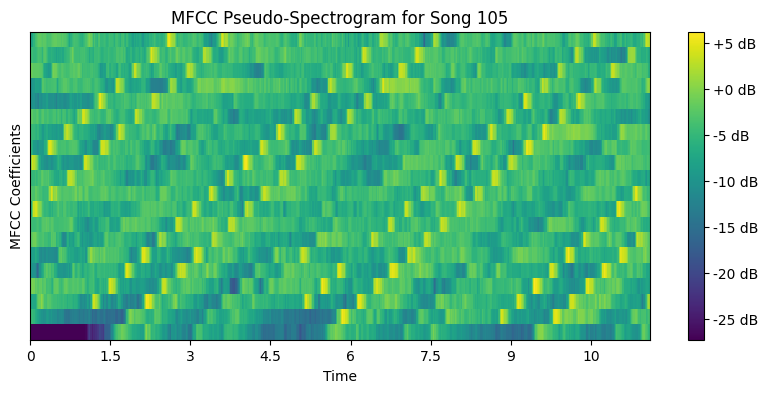

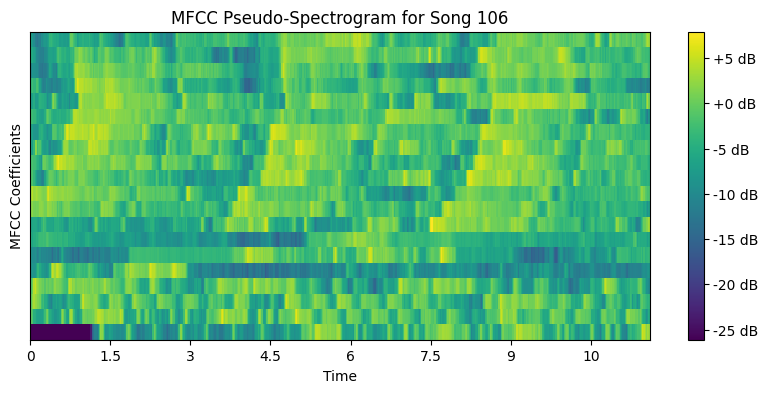

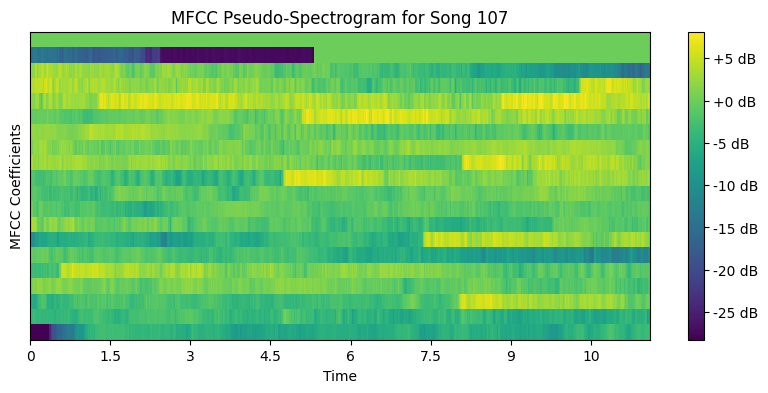

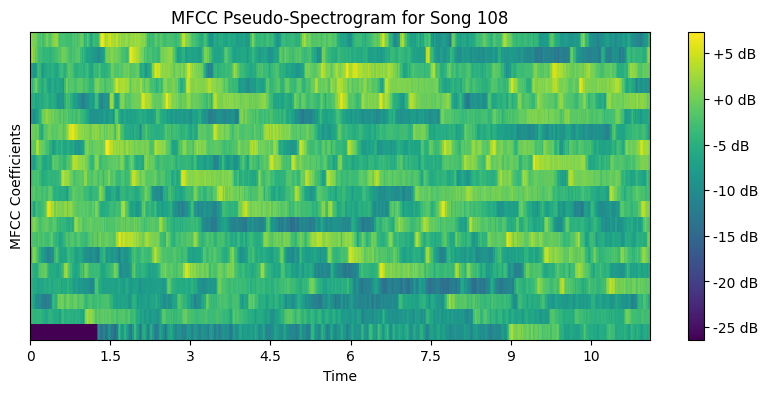

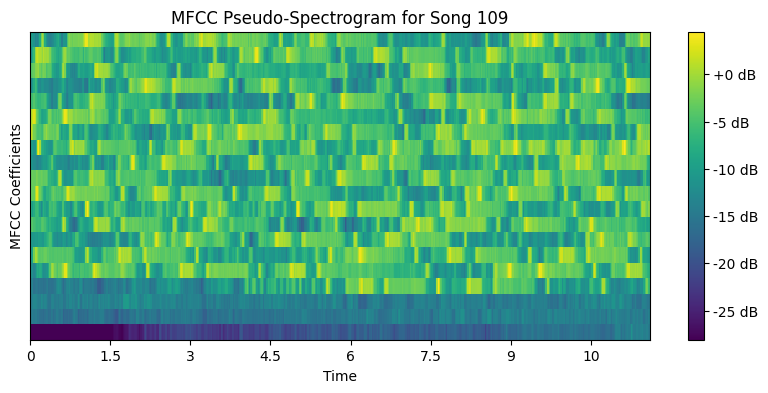

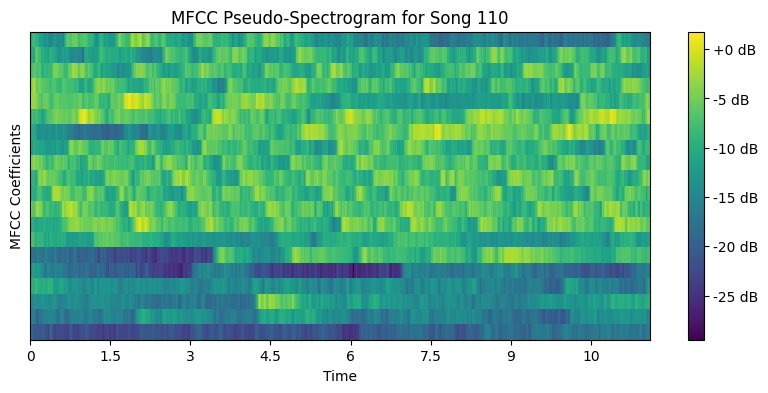

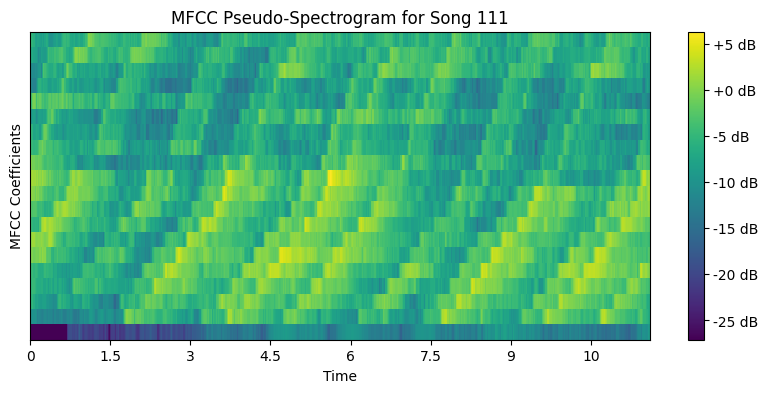

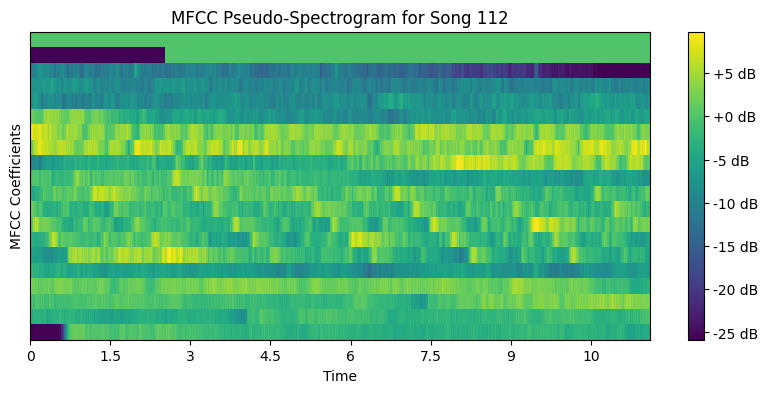

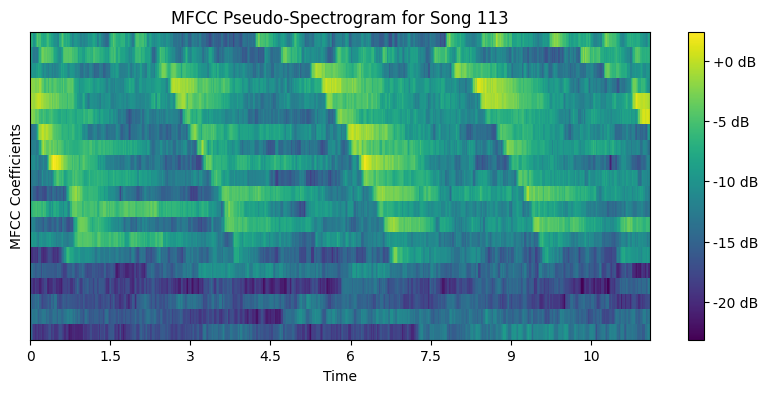

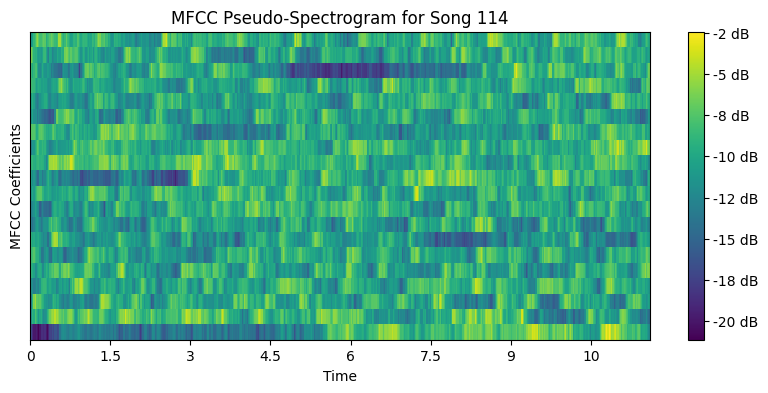

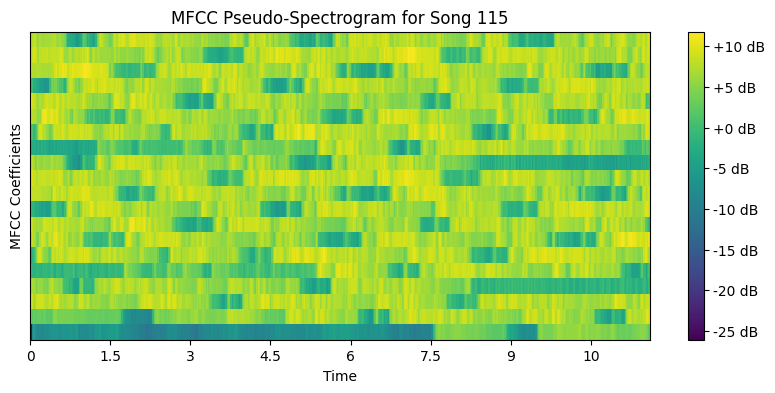

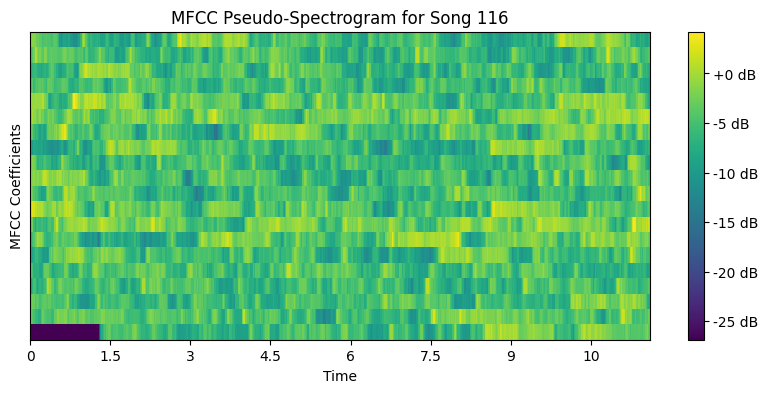

In [9]:
import librosa.display
import matplotlib.pyplot as plt

for i, song in enumerate(song_vectors[:116]):  # Adjust the range as needed
    plt.figure(figsize=(10, 4))
    # Reshape or use as-is depending on data format (assuming song_vectors[i] contains full MFCC data)
    mfcc_data = song.reshape((20, -1))  # Assuming each song has 20 MFCC rows

    librosa.display.specshow(mfcc_data, x_axis='time', sr=22050, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"MFCC Pseudo-Spectrogram for Song {i+1}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()
